<h1 id="header" align="center">
  Car Price Prediction - Exploratory data analysis.
  <img src="https://media.tenor.com/UtkIFBDTlAAAAAAi/car-cars.gif" width="40px"/>
</h1>

---

### Вступление

_EDA (разведочный анализ данных)_ - это процесс изучения основных свойств данных, нахождения в них закономерностей, аномалий и различных распределений, построений моделей с помощью визуализации.

Известно, что не существует единой последовательности операций для выполнения анализа, но есть **базовые пункты**, которые необходимо выполнить.

Данный анализ проводится в рамках изучения дисциплины _"Инижиниринг управления данными"_ в университете ИТМО.
Анализ проводится над **выбранном в kaggle dataset**.

### Информация об dataset.

_Dataset - Car Price Prediction Challenge_ - является набором данных об различных проданных автомобилях с их параметрами.  
Например:
1) Manufacturer (Производитель)
2) Leather interior (Кожаный салон)
3) Fuel type (Тип топлива)  
и т.д ...

Всего таких параметров - **15**.

Ссылка на оригинальный dataset - https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge?resource=download  
Ссылка на dataset, сохраненный в Google Drive - https://docs.google.com/spreadsheets/d/1PMhtD3LqyCzlZMEh-8aDPxre0wPw8v0U/edit?usp=drive_link&ouid=100105970921534140705&rtpof=true&sd=true



### Цель (target) EDA.

Целью EDA является -  __выявление ключевых факторов (features), влияющих на стоимость__.  
  
Также передо мной стоит цель соответствовать следующим __метрикам__ (как минимум первым двум):

![Metrics](./images/Metrics.png)



---

### Этапы EDA.

#### 1) Загрузка данных с сайта и сохранения их в директории для дальнейшего взаимодействия

>[!IMPORTANT]  
>Всегда активируем окружение как рассказано в файле [README.md](../README.md).  
>Не забываем добавить в нашего окружение (Conda+Poetry) необходимые зависимости:
>1) _pandas_
>2) _numpy_
>3) _seaborn_
>4) _matplotlib_
>5) _openpyxl_  
>6) _plotly_

В первую очередь, так как датасет не сохранен в директории проекта, необходимо создать директорию _data_ в корне. А после выполнить в созданную директорию загрузку _сырых данных_ в формате xlsx.    
Здесь же выполним подключение основных библиотек для проведения дальнейшего EDA.


In [1]:
import os
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline
sns.set(color_codes=True, font="Arial", font_scale=1)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10

FILE_ID = "1PMhtD3LqyCzlZMEh-8aDPxre0wPw8v0U"  # ID файла на Google Drive
file_url = f"https://drive.google.com/uc?id={FILE_ID}"

pd.set_option("display.max_columns", 20) # убирает ограничения отображения dataset
pd.set_option("display.max_rows", 150)

data_dir = "../data" # создаем директорию data в директории notebooks.
if not os.path.exists(data_dir):
    os.makedirs(data_dir) 

data_path = os.path.join(data_dir, "data_car.xlsx") # путь до файла dataset

if os.path.isfile(data_path): # если файл есть в data - читаем, если нет - скачиваем
    df = pd.read_excel(data_path)
    df = df.replace("-", pd.NA)  # убираем все ложные пропуски на NaN
    print(f"{'-'*60}")
    print ("Dataset прочитан из директории data...")
    print(f"{'-'*60}")
else:
    response = requests.get(file_url)
    f_path = os.path.join(data_dir, "data_car.xlsx") # путь до файла dataset
    with open(f_path, "wb") as f:
        f.write(response.content)

    df = pd.read_excel(f_path)
    df = df.replace("-", pd.NA)  # убираем все ложные пропуски на NaN
    print(f"{'-'*60}")
    print("Dataset загружен в директорию data и прочитан...")
    print(f"{'-'*60}")


------------------------------------------------------------
Dataset прочитан из директории data...
------------------------------------------------------------



---

#### 2) Первичный осмотр данных

После _чтения/загрузки dataset из директории/в директорию_ необходимо _осмотреть_ полученные данные и провести _первичную оценку_.  
Поэтому выведем _10 первых и 10 последних значений_ dataset. А также проверим _количество признаков и элементов_.

In [2]:
df.head(10)        

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,<NA>,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,<NA>,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [3]:
df.tail(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19227,45769427,29793,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19228,45773726,706,1850,MERCEDES-BENZ,E 350,2008,Sedan,Yes,Diesel,3.5,122874 km,6.0,Automatic,Rear,04-May,Left wheel,Black,12
19229,39977395,50,<NA>,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6
19230,45760891,470,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800 km,6.0,Automatic,Rear,04-May,Left wheel,Grey,12
19232,45798355,8467,<NA>,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [4]:
df.shape

(19237, 18)

После этого предлагаю исследовать _в каких типах данных сохранились_ 18 признаков.

In [5]:
df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object


---

#### 3) Операции над данными.

После осмотра данных необходимо выполнить определенные действия для дальнейшего удобства анализа.  
Например - _решение проблемы пустых значений, дубликатов и выбросов, удаление ненужных для текущей target признаков и приведение типов_ 



##### 3.1) Удаление признаков
Так как наша цель заключается в ранжировании признаков по их влиянию на ценообразование, я предлагаю _удалить следующие признаки_:
- cylinders - так как основной акцент на ценообразование будет от типа двигателя, а не от количества цилиндров.
- drive wheels - опять таки минимальный эффект на ценообразование. И кроме того тип привода завязан на моделе авто и его типа.
- color - минимальное влияния на цену автомобиля.
- airbags - минимальное влияние на цену автомобиля.


In [6]:
df = df.drop(["Cylinders", "Drive wheels", "Color", "Airbags"], axis=1)
df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Doors,Wheel
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,04-May,Left wheel
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,Tiptronic,04-May,Left wheel
2,45774419,8467,<NA>,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,Variator,04-May,Right-hand drive
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,04-May,Left wheel
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,04-May,Left wheel


##### 3.2) Проверка категориальных признаков
Типы данных могут быть _числовыми и категориальными_. Поэтому следует рассмотреть их точнее и в последствии привести их к нужному типу.

In [7]:
df.select_dtypes(exclude="number").head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Doors,Wheel
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,04-May,Left wheel
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,04-May,Left wheel
2,<NA>,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,04-May,Right-hand drive
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,04-May,Left wheel
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,04-May,Left wheel


Как мы видим `Levy` и `Mileage` скорее числовые признаки, нежели нечисловые. В `Levy` имеются пропуски, а в `Mileage` приписка km. _Давайте это исправим._  

Посмотрим на количество в `Levy` _пустых значений_.

In [8]:
df.isna().sum()

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Gear box type          0
Doors                  0
Wheel                  0
dtype: int64

**Визуальное отображение пропусков:**

Text(0, 0.5, 'Sample Number')

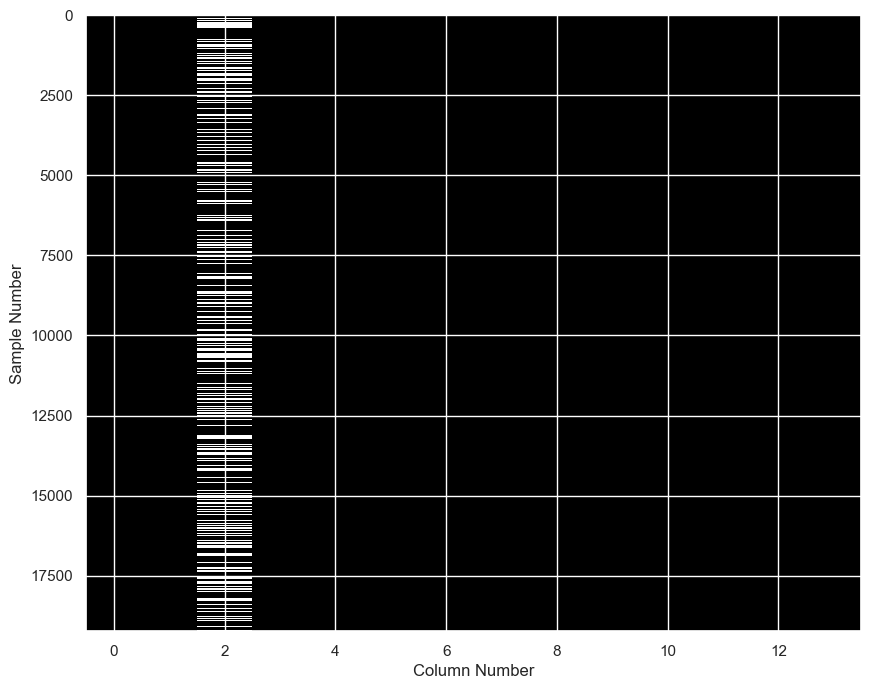

In [9]:
plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

Можно увидеть _количество пропусков в признаке `Levy` - очень большое_. И при этом признак, предполагается, одним из важнейших, так как содержит налог на автомобиль.  
Следовательно, лучшим выходом будет выполнить **заполнение по медиане**.

In [10]:
df["Levy"] = df["Levy"].astype(
    "Int16"
)  # данный тип данных позволяет преобразовать признак с пропусками
df["Levy"] = df["Levy"].fillna(df["Levy"].median())
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Gear box type       0
Doors               0
Wheel               0
dtype: int64

Далее разберем признак `Mileage`, который необходимо _привести в числовой тип, при этом убрав приписку km_.

In [11]:
df["Mileage"] = df["Mileage"].str.replace(" km", "", regex=False)
df["Mileage"].head(10)

0    186005
1    192000
2    200000
3    168966
4     91901
5    160931
6    258909
7    216118
8    398069
9    128500
Name: Mileage, dtype: object

In [12]:
df["Mileage"] = df["Mileage"].astype("int32")
df["Mileage"].head(10)

0    186005
1    192000
2    200000
3    168966
4     91901
5    160931
6    258909
7    216118
8    398069
9    128500
Name: Mileage, dtype: int32

Еще раз выведем категориальные признаки, чтобы проверить не упустили ли мы что-то.

In [13]:
df.select_dtypes(exclude="number").head()

,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Gear box type,Doors,Wheel
0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,Automatic,04-May,Left wheel
1,CHEVROLET,Equinox,Jeep,No,Petrol,3,Tiptronic,04-May,Left wheel
2,HONDA,FIT,Hatchback,No,Petrol,1.3,Variator,04-May,Right-hand drive
3,FORD,Escape,Jeep,Yes,Hybrid,2.5,Automatic,04-May,Left wheel
4,HONDA,FIT,Hatchback,Yes,Petrol,1.3,Automatic,04-May,Left wheel


Признак `Engine volume` оставляем _нечисловым_, так как помимо объема двигателя в признаке указывается - *с турбонаддувом двигатель или нет*

##### 3.3) Проверка числовых признаков
Разберем _числовые признаки_ dataset. Кроме того дополнительно проверим нахождения тут измененных признаков из пункта выше.

In [14]:
df.select_dtypes(include="number").head()

,ID,Price,Levy,Prod. year,Mileage
0,45654403,13328,1399,2010,186005
1,44731507,16621,1018,2011,192000
2,45774419,8467,781,2006,200000
3,45769185,3607,862,2011,168966
4,45809263,11726,446,2014,91901


**Все хорошо**, теперь можно рассмотреть количество уникальных значений в каждом из признаков. Это поможет точнее выбрать тип для приведения.

In [15]:
uniq_val = df.select_dtypes(include="number").nunique().sort_values()

fig = px.bar(
    x=uniq_val.index,
    y=uniq_val.values,
    labels={"x": "Features", "y": "Count"},
    template="seaborn",
)

fig.update_layout(xaxis_tickangle=0, height=600, showlegend=False, font=dict(family="Arial", size=10), title=dict(
        text="Уникальные значения в каждом признаке",
        font=dict(
            family="Arial",
            size=16,
            weight="bold"  # Делает текст жирным
        )
    )
)

fig.update_traces(texttemplate="%{y}", textposition="outside")

fig.show()

##### 3.4) Проверка дубликатов

Так как мы хотим добиться уникальности записей, то необходимо провести над нашими данными _проверку дубликатов_ по их ID.

In [16]:
df.shape

(19237, 14)

In [17]:
duplic_rows_df = df[df.duplicated()]
duplic_rows_df.shape

(313, 14)

Их оказалось не так много, учитывая весь объем датасета. _Поэтому мы можем их смело удалить_.

In [18]:
df = df.drop_duplicates()
df.shape

(18924, 14)

##### 3.5) Переименование признаков

Анализируя данные мы пришли к выводу, что необходимо переименовать некоторые признаки, так как они мало отражают содержащиеся в них сведения.  
Все переименования будут указны также в файле [NAMING.txt](../docs/NAMING.txt) в директории *docs*.  
Перед этим выведем все названия.

In [19]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Doors,Wheel
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,Automatic,04-May,Left wheel
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,Tiptronic,04-May,Left wheel
2,45774419,8467,781,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,Variator,04-May,Right-hand drive
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,Automatic,04-May,Left wheel
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,Automatic,04-May,Left wheel


In [20]:
df = df.rename(
    columns={
        "Levy": "Tax",
        "Prod. year": "Release_year",
        "Category": "Car_type",
        "Gear box type": "Transmission_type",
    }
)
df.head()

,ID,Price,Tax,Manufacturer,Model,Release_year,Car_type,Leather interior,Fuel type,Engine volume,Mileage,Transmission_type,Doors,Wheel
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,Automatic,04-May,Left wheel
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,Tiptronic,04-May,Left wheel
2,45774419,8467,781,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,Variator,04-May,Right-hand drive
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,Automatic,04-May,Left wheel
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,Automatic,04-May,Left wheel


##### 3.6) Обнаружение и обработка выбросов в числовых признаках

Важно предупредить момент выбросов и ошибочных огромных значений в числовых параметрах. Особенно перед приведением типов.  
Такие выбросы будут негативно влиять на наш конечный вывод, что приведет к **некорректному решению поставленной цели**.  
Вызовем для отображения снова числовые параметры.

In [21]:
df.select_dtypes(include="number").head()

,ID,Price,Tax,Release_year,Mileage
0,45654403,13328,1399,2010,186005
1,44731507,16621,1018,2011,192000
2,45774419,8467,781,2006,200000
3,45769185,3607,862,2011,168966
4,45809263,11726,446,2014,91901


<Axes: xlabel='Price'>

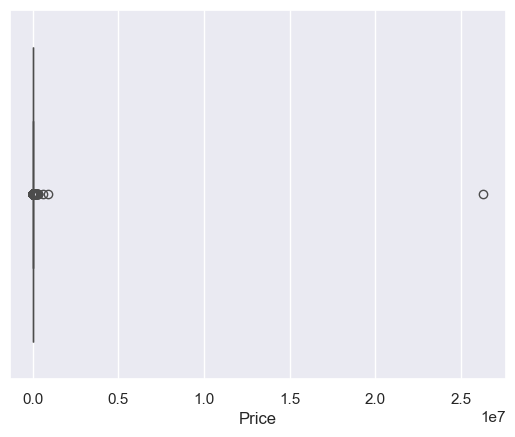

In [22]:
sns.boxplot(x=df["Price"])

<Axes: xlabel='Tax'>

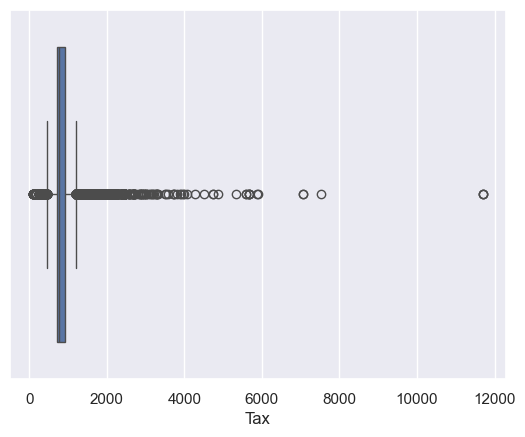

In [23]:
sns.boxplot(x=df["Tax"])

<Axes: xlabel='Release_year'>

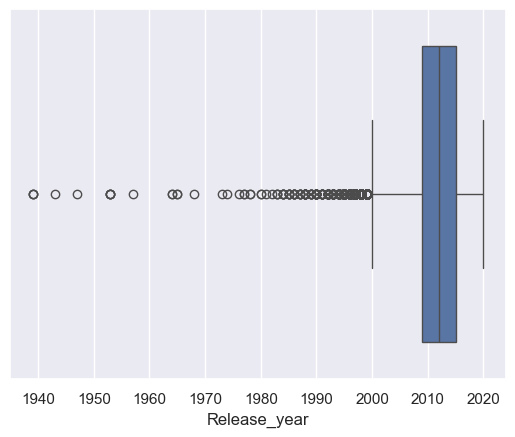

In [24]:
sns.boxplot(x=df["Release_year"])

<Axes: xlabel='Mileage'>

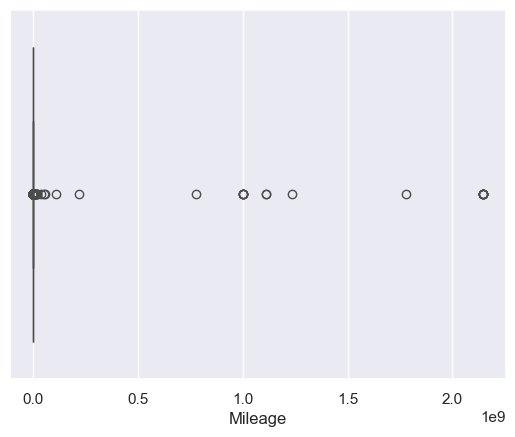

In [25]:
sns.boxplot(x=df["Mileage"])

Как видно по графикам - проблемы **есть**. А конкретно в признаках `Price`, `Tax`, `Mileage`.  
Это необходимо решать. Начнем с признака `Price`.

In [26]:
df["Price"].nlargest(5)

16983    26307500
8541       872946
1225       627220
5008       308906
9367       297930
Name: Price, dtype: int64

Давайте посмотрим какие автомобили имеют такой ценник.

In [27]:
df[df["Price"].isin([26307500, 872946, 627220])]

,ID,Price,Tax,Manufacturer,Model,Release_year,Car_type,Leather interior,Fuel type,Engine volume,Mileage,Transmission_type,Doors,Wheel
1225,45795524,627220,781,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3 Turbo,0,Tiptronic,04-May,Left wheel
8541,45761204,872946,2067,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,4,2531,Tiptronic,04-May,Left wheel
16983,45812886,26307500,781,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999,Manual,02-Mar,Left wheel


Мы нашли и проанализировали выбросы и первые два автомобиля - имеют адекватную цену. А вот третий - _Opel Combo_ не может стоить такую сумму. Это необходимо исправить.

In [28]:
df["Price"] = df["Price"].mask(df["Price"] > 900000, df["Price"].median())
df["Price"].nlargest(5)

8541     872946
1225     627220
5008     308906
9367     297930
14839    297930
Name: Price, dtype: int64

_Что мы сделали?_  
Так как в признаке мы обнаружили и определили единичный выброс с суммой, которая невозможна для того типа автомобиля (<ins>цены указаны в долларах</ins>).  
Поэтому было принято решение заменить этот выброс на **медианное значение**.  
Ниже снова выведем график `Price`:

<Axes: xlabel='Price'>

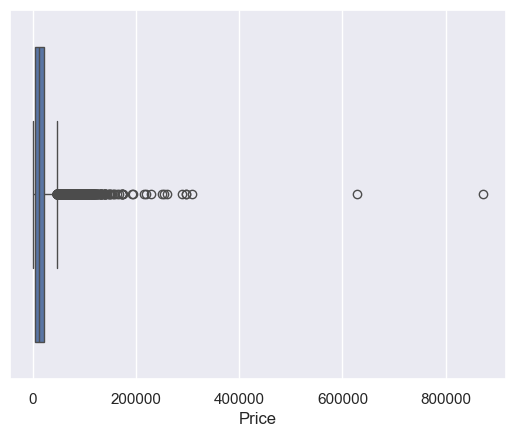

In [29]:
sns.boxplot(x=df["Price"])

Теперь проанализируем `Tax`

In [30]:
df["Tax"].nlargest(10)

115      11714
18984    11714
18957    11706
17117     7536
3994      7063
2159      7058
5529      5908
5367      5877
17767     5681
2323      5679
Name: Tax, dtype: Int16

Опять посмотрим на автомобили:

In [31]:
df[df["Tax"].isin([11714, 11706, 7536, 7063, 7058])]

,ID,Price,Tax,Manufacturer,Model,Release_year,Car_type,Leather interior,Fuel type,Engine volume,Mileage,Transmission_type,Doors,Wheel
115,45534351,11917,11714,MERCEDES-BENZ,E 500 AMG,2003,Sedan,Yes,Petrol,5,150000,Tiptronic,04-May,Right-hand drive
2159,45804871,10349,7058,SUBARU,Legacy,2005,Sedan,Yes,Petrol,3,147000,Tiptronic,04-May,Right-hand drive
3994,45782188,13172,7063,TOYOTA,Alphard,2003,Minivan,Yes,LPG,3,190000,Automatic,04-May,Right-hand drive
17117,45781442,7213,7536,MITSUBISHI,Pajero,2000,Jeep,Yes,CNG,3.2,210000,Automatic,04-May,Right-hand drive
18957,44674964,14740,11706,MERCEDES-BENZ,E 500 AVG,2005,Sedan,Yes,Petrol,5,56000,Tiptronic,04-May,Right-hand drive
18984,45221191,11917,11714,MERCEDES-BENZ,E 500,2003,Sedan,Yes,Petrol,5,150000,Tiptronic,04-May,Right-hand drive


Просмотрев автомобили с такими налогами стало понятно - **выбросов в признаке НЕТ!**

Теперь проверим признак `Mileage`:

In [32]:
df["Mileage"].nlargest(10)

2278     2147483647
6157     2147483647
11901    2147483647
12734    2147483647
15347    2147483647
15393    2147483647
19167    2147483647
17582    1777777778
7724     1234567899
9524     1111111111
Name: Mileage, dtype: int32

В этом признаке явно что-то аномальное (магические числа). Проверим с помощью _межквартильного размаха(IQR)_.  
<ins>Определение IQR</ins> - это статистическая мера, показывающая разброс средних 50% данных, отсекая крайние значения.

In [33]:
Q1_Mil = df["Mileage"].quantile(0.25)
Q3_Mil = df["Mileage"].quantile(0.75)
IQR_Mil = Q3_Mil - Q1_Mil
up_bound_Mil = Q3_Mil + 1.5 * IQR_Mil
down_bound_Mil = Q1_Mil - 1.5 * IQR_Mil

errors = df[df["Mileage"] > up_bound_Mil]
errors_type_2 = df[df["Mileage"] < down_bound_Mil]
len(errors)  # количество записей-выбросов выше верхней границы

635

In [34]:
len(errors_type_2)  # количество записей-выбросов ниже нижней границы

0

Делаем вывод, что 635 значений - у нас точно являются выбросами или некорректными значениями.  
Так как у нас почти __19000 строчек__, то принимаем решение по удалению этих выбросов.

In [35]:
df = df[
    df["Mileage"] <= up_bound_Mil
]  # оставляем в Mileage только те значения, которые попали до верхней границы
df["Mileage"].nlargest(10)

1086     367053
7259     367000
14709    367000
4961     366869
8948     366869
9125     366869
10944    366869
15132    366869
16628    366869
9840     365810
Name: Mileage, dtype: int32

<Axes: xlabel='Mileage'>

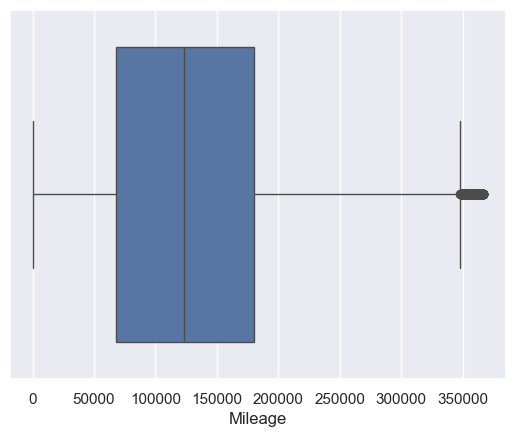

In [36]:
sns.boxplot(x=df["Mileage"])

_Вывод_ - мы задетектировали выбросы в числовых признаках и их убрали.

##### 3.7) Приведение типов и сохранение в формате .parquet

Дальнейший анализ предполагает точный результат, поэтому я хотел бы использовать максимально обработанные и скорректированные данные. И в быстро работающем формате .parquet.  
Выведем признаки и их типы:

In [37]:
df.dtypes

ID                    int64
Price                 int64
Tax                   Int16
Manufacturer         object
Model                object
Release_year          int64
Car_type             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage               int32
Transmission_type    object
Doors                object
Wheel                object
dtype: object

Выполним _приведение типов_:

In [38]:
df["ID"] = df["ID"].astype("int32")
df["Price"] = df["Price"].astype("int32")
df["Manufacturer"] = df["Manufacturer"].astype("category")
df["Model"] = df["Model"].astype("category")
df["Tax"] = df["Tax"].astype("int32")
df["Release_year"] = df["Release_year"].astype("int16")
df["Car_type"] = df["Car_type"].astype("category")
df["Have a leather interior?"] = (
    df["Leather interior"].map({"No": 0, "Yes": 1}).astype("bool")
)  # добавляем к оригинальному признаку  булевый признак.

df["Car have a left wheel?"] = (
    df["Wheel"].map({"Right-hand drive": 0, "Left wheel": 1}).astype("bool")
)

df["Fuel type"] = df["Fuel type"].astype("category")
df["Transmission_type"] = df["Transmission_type"].astype("category")
df["Doors"] = df["Doors"].astype("category")
df[["Leather interior", "Wheel"]] = df[
    ["Have a leather interior?", "Car have a left wheel?"]
]  # заменяем оригинал на булевый.
df = df.drop(
    columns=["Have a leather interior?", "Car have a left wheel?"]
)  # удаляем дополнительные признаки.

df.rename(
    columns={"Leather interior": "Have a leather interior?"}, inplace=True
)  # переименовываем.
df.rename(columns={"Wheel": "Car have a left wheel?"}, inplace=True)

df.dtypes

ID                             int32
Price                          int32
Tax                            int32
Manufacturer                category
Model                       category
Release_year                   int16
Car_type                    category
Have a leather interior?        bool
Fuel type                   category
Engine volume                 object
Mileage                        int32
Transmission_type           category
Doors                       category
Car have a left wheel?          bool
dtype: object

Мы привели типы и теперь сохраним наш новый рабочий dataset в формате .parquet

In [39]:
fi_path = os.path.join(data_dir, "data_car.parquet")  # путь до файла dataset
df.to_parquet(fi_path)  # сохраняем dataset в .parquet
df_par = pd.read_parquet(fi_path)
df_par.head()

,ID,Price,Tax,Manufacturer,Model,Release_year,Car_type,Have a leather interior?,Fuel type,Engine volume,Mileage,Transmission_type,Doors,Car have a left wheel?
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,Automatic,04-May,True
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3,192000,Tiptronic,04-May,True
2,45774419,8467,781,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,Variator,04-May,False
3,45769185,3607,862,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,Automatic,04-May,True
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,Automatic,04-May,True



---

#### 4) Проверка по метрикам

Решим проходит ли наш dataset по метрикам - **Completeness и Uniqueness**.

In [40]:
completeness = df_par.count() / len(df_par)
uniqueness = df_par["ID"].nunique() / len(
    df_par["ID"]
)  # так как этот параметр напрямую отвечает за уникальность значений в признаках.
print(completeness)
print(f"{'-'*60}")
print(f"ID = {uniqueness}")

ID                          1.0
Price                       1.0
Tax                         1.0
Manufacturer                1.0
Model                       1.0
Release_year                1.0
Car_type                    1.0
Have a leather interior?    1.0
Fuel type                   1.0
Engine volume               1.0
Mileage                     1.0
Transmission_type           1.0
Doors                       1.0
Car have a left wheel?      1.0
dtype: float64
------------------------------------------------------------
ID = 1.0



---

#### 5) Валидация данных

Проведем валидацию корректности данных с помощью _assert_ и команд _try/except_.  
Если проверки будут успешными - то переходим к графикам и диаграммам.

In [41]:
try:
    assert (df_par["Price"].dtype == "int32") and ((df_par["Price"] >= 0).all())
    print("Валидация Price - успешна")
except AssertionError:
    print("ERROR in Price")

try:
    assert (df_par["Tax"].dtype == "int32") and ((df_par["Tax"] >= 0).all())
    print("Валидация Tax - успешна")
except AssertionError:
    print("ERROR in Tax")

try:
    assert (
        (df_par["Release_year"].dtype == "int16")
        and ((df_par["Release_year"] >= 1900).all())
        and ((df_par["Release_year"] <= 2100).all())
    )
    print("Валидация Release_year - успешна")
except AssertionError:
    print("ERROR in Release_year")

try:
    assert (df_par["Have a leather interior?"].dtype == "bool") and (
        (df_par["Have a leather interior?"].isin([True, False]).all())
    )
    print("Валидация Have a leather interior? - успешна")
except AssertionError:
    print("ERROR in Have a leather interior?")

try:
    assert (df_par["Mileage"].dtype == "int32") and ((df_par["Mileage"] >= 0).all())
    print("Валидация Mileage - успешна")
except AssertionError:
    print("ERROR in Mileage")

try:
    assert (df_par["Car have a left wheel?"].dtype == "bool") and (
        (df_par["Car have a left wheel?"].isin([True, False]).all())
    )
    print("Валидация Car have a left wheel? - успешна")
except AssertionError:
    print("ERROR in Car have a left wheel?")

Валидация Price - успешна
Валидация Tax - успешна
Валидация Release_year - успешна
Валидация Have a leather interior? - успешна
Валидация Mileage - успешна
Валидация Car have a left wheel? - успешна


__Валидация числовых и булевых признаков__ - прошла успешно!  


---

#### 6) Анализы данных для решения задачи



##### 6.1) Анализ распределения целевой переменной - Price

Повторно озвучиваем цель - **провести ранжирование признаков по влиянию на ценообразования автомобиля**.  
Следовательно основной целевой переменной мы берем признак `Price`. Выведем гистограмму и boxplot.

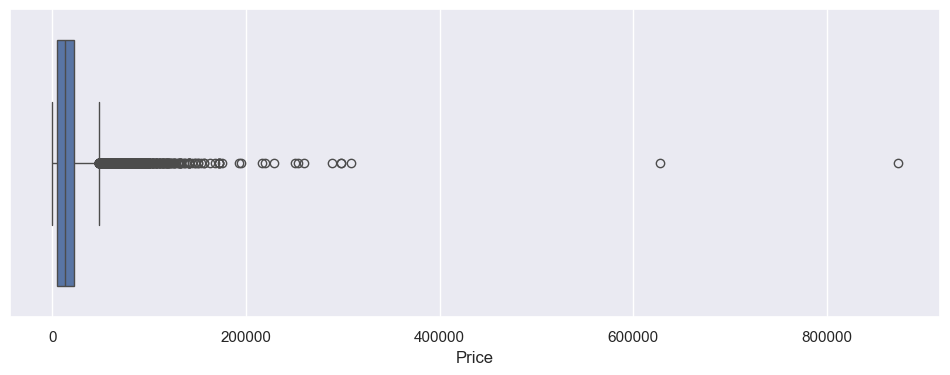

In [42]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df_par["Price"])
plt.show()

In [43]:
fig = px.histogram(
    df_par,
    x="Price",
    nbins=50,
    template="seaborn",
)

fig.update_layout(
    font=dict(family="Arial", size=10),
    title=dict(
        text="Распределение цены",
        font=dict(family="Arial", size=16, weight="bold"),  # Делает текст жирным
    )
)
fig.show()

Как мы обсуждали выше - **две точки с ценой от 600000 долларов - это нормальная цена для представленных там автомобилей**.

##### 6.2) Построение корреляционной карты и точечных графиков для коррелирующих признаков

Для определения корреляций между признаками воспользуемся методами `heatmap` и `scatterplot`.

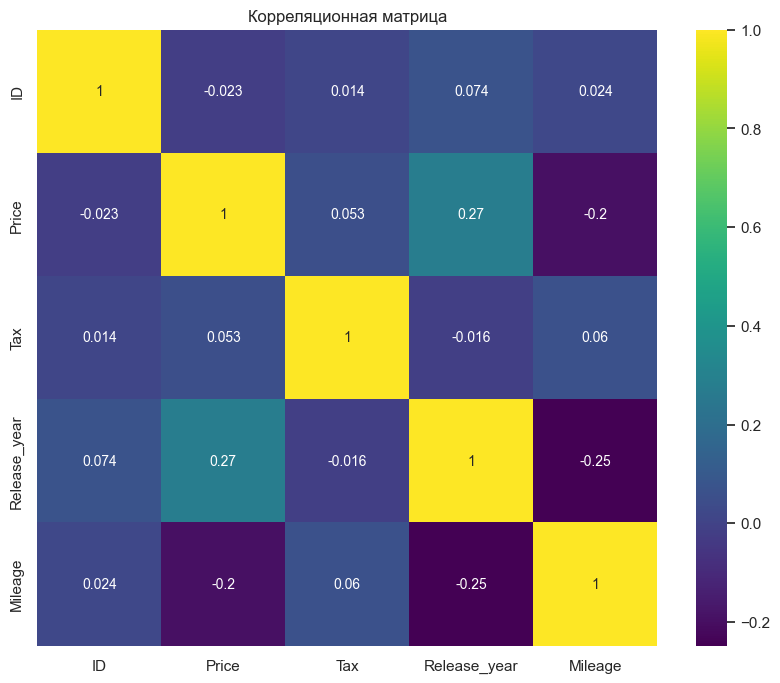

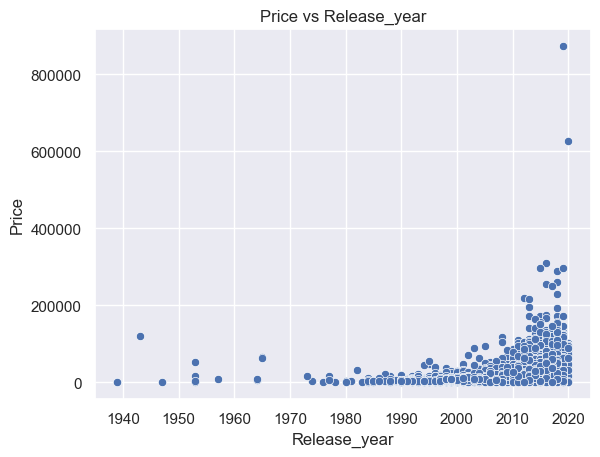

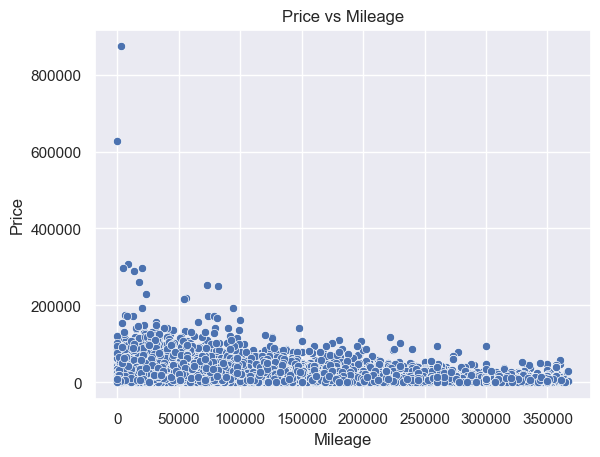

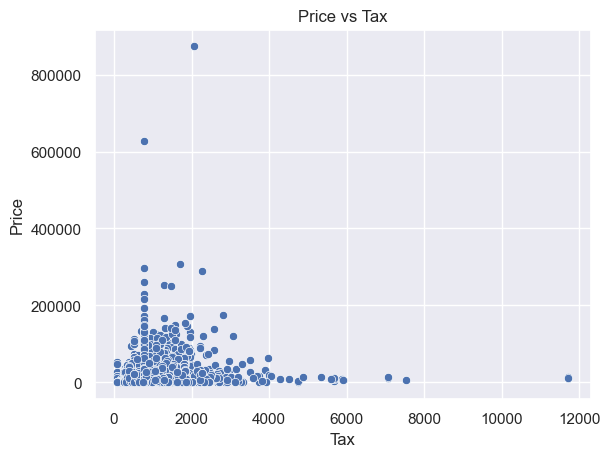

In [44]:
num_df_par = df_par.select_dtypes(include="number").columns

plt.figure(figsize=(10, 8))
sns.heatmap(df_par[num_df_par].corr(), annot=True, cmap="viridis")
plt.title("Корреляционная матрица")
plt.show()

top_corr_ft = (
    df_par[num_df_par].corr()["Price"].abs().sort_values(ascending=False).index[1:4]
)
for features in top_corr_ft:
    sns.scatterplot(data=df_par, x=features, y="Price")
    plt.title(f"Price vs {features}")
    plt.show()

Предлагаю рассмотреть распределения признаков `Release_year`, `Mileage`, `Tax`:

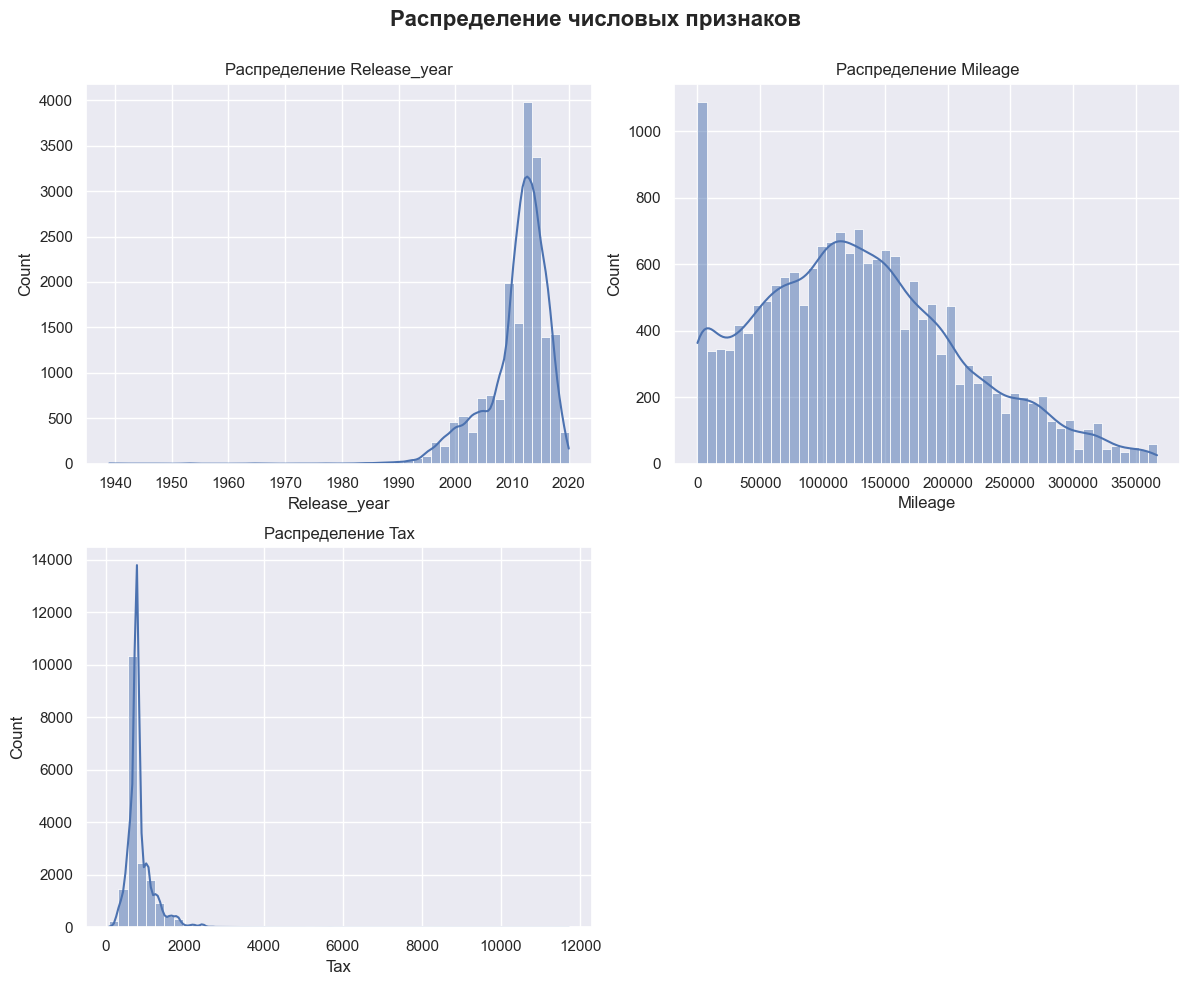

In [45]:
num_cols = ["Release_year", "Mileage", "Tax"][:3]  # числовые признаки

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Распределение числовых признаков\n", fontsize=16, fontweight="bold")

axes_flat = axes.flat

for i, col in enumerate(num_cols):
    sns.histplot(data=df_par, x=col, ax=axes_flat[i], bins=50, kde=True)
    axes_flat[i].set_title(f"Распределение {col}")
    axes_flat[i].tick_params(axis="x", rotation=0)

for i in range(len(num_cols), len(axes_flat)):
    axes_flat[i].set_visible(False)

plt.tight_layout()
plt.show()

_Промежуточный вывод_ - мы получили наши точечные графики корреляции признаков с основным признаком `Price`.
  
Сразу заметно, что эти графики представляют собой своеобразное "облако из точек" и в некоторых ситуациях, например с признаками `Mileage` и `Pelease_year`, можно заметить что-то похожее на, в первом случае **нисходящую прямую линию**, а во втором случае **восходящую прямую линию**.  
Что может говорить нам следующее:
- С увеличением пробега - цена автомобиля падает.
- Чем новее выпущен автомобиль - тем выше его цена.

Но не стоит забыть, что в основном это "облака из точек", т.е интерпретируя это показывает на достаточно слабую зависимость.

Также гипотеза о слабой зависимости `Price` от числовых параметров подтверждается коррелляционной матрицей. Так как максимальное число в ней, из положительных естественно, это 0,27 - что, исходя из определения <ins>коэффициента корреляции Пирсона</ins>, говорит нам о слабой положительной корреляции.

Кроме того из распределений сделаем следующие выводы:
1) В основном в нем представлены автомобили выпуска __2000-2018 годов__.
2) Среднем значение __пробега__ - примерно от 100000 до 150000 км.
3) Средний __налог__ на авто - 500 долларов

_А эти данные указывают на то, что датасет создавался на основе реальных величин и реальных показателей в автомобильной промышленности_.

Теперь проведем проверку _категориальных признаков_:

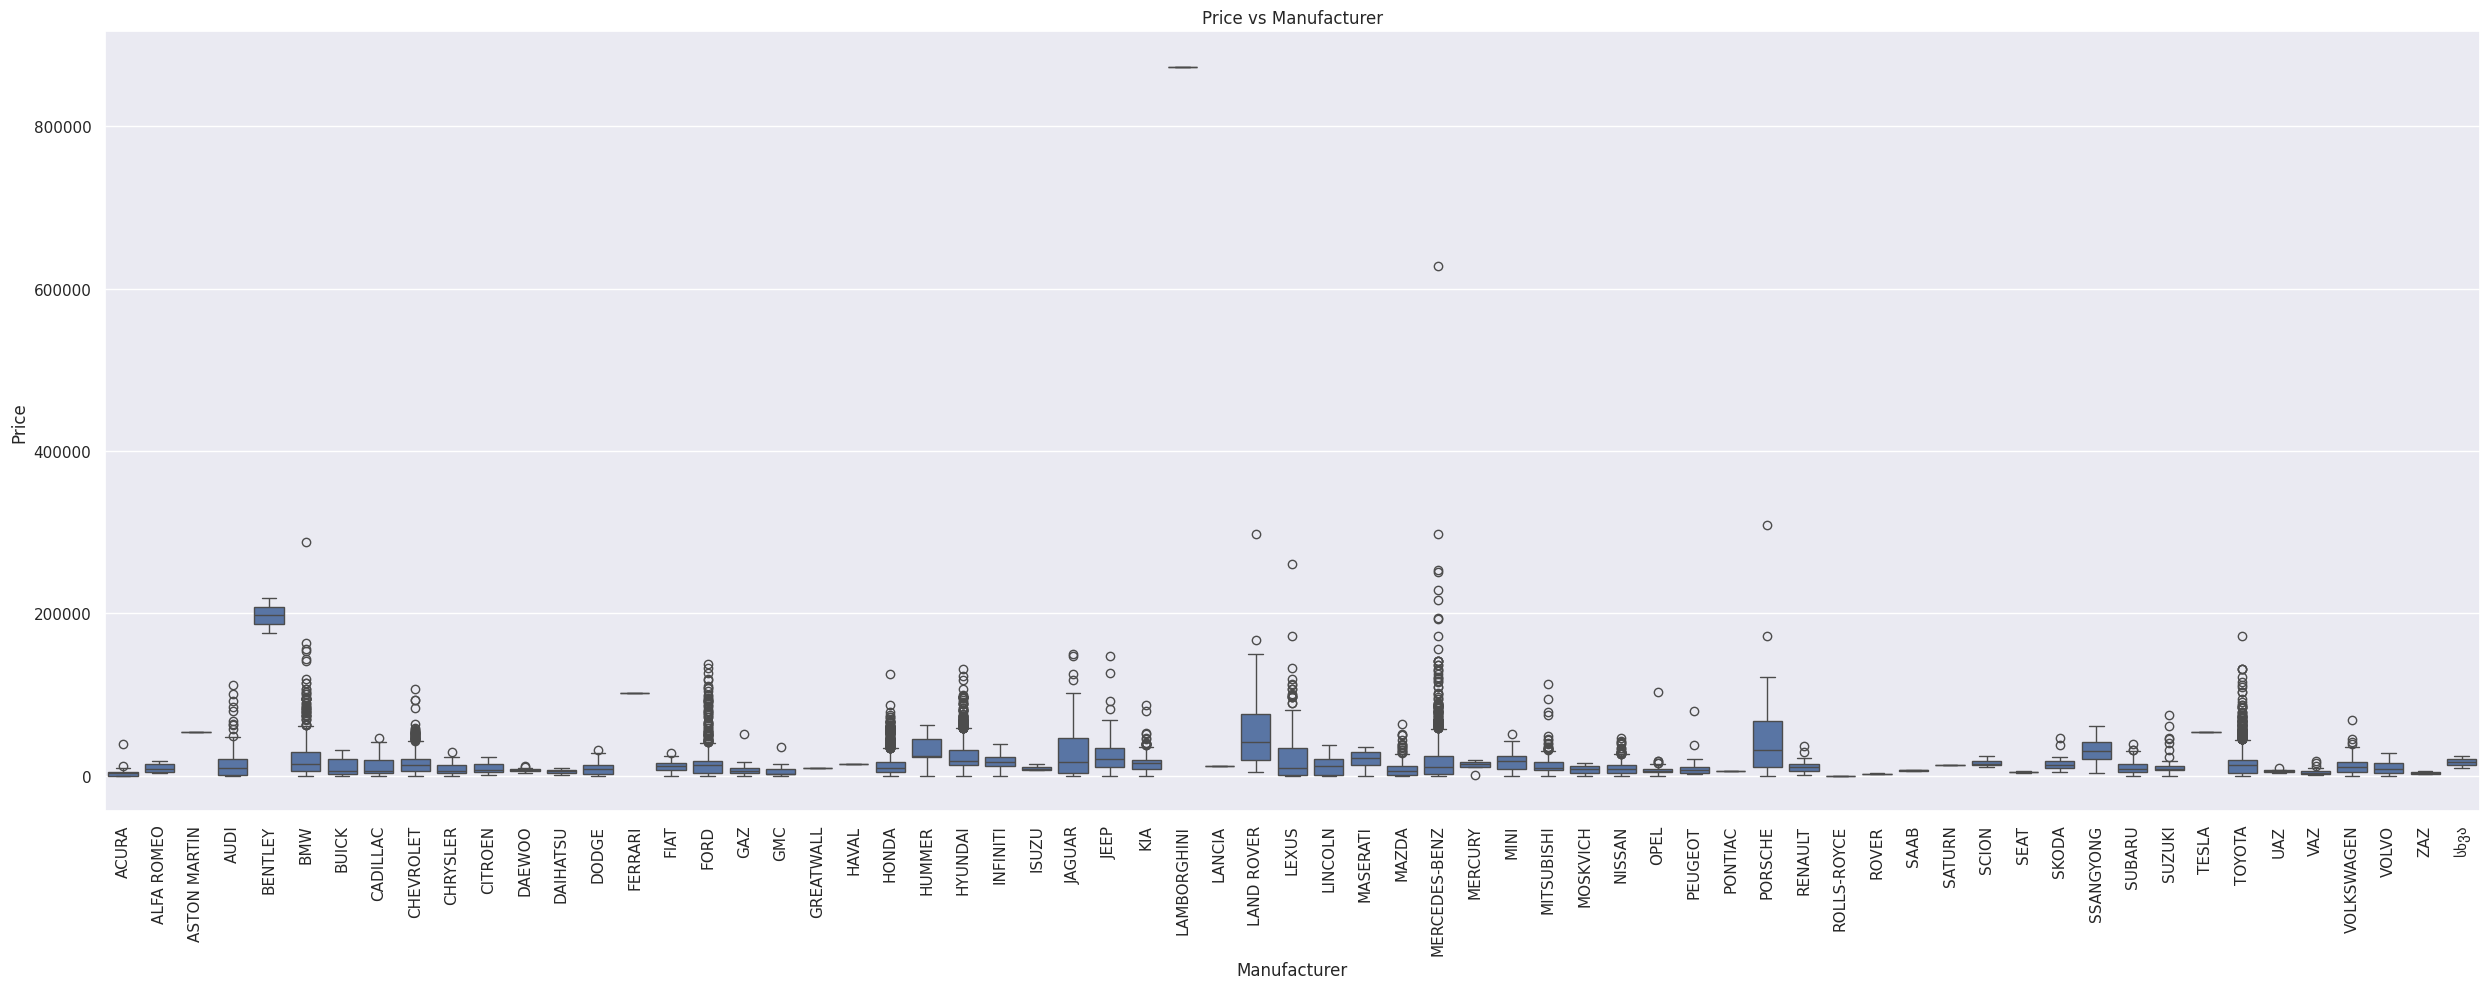

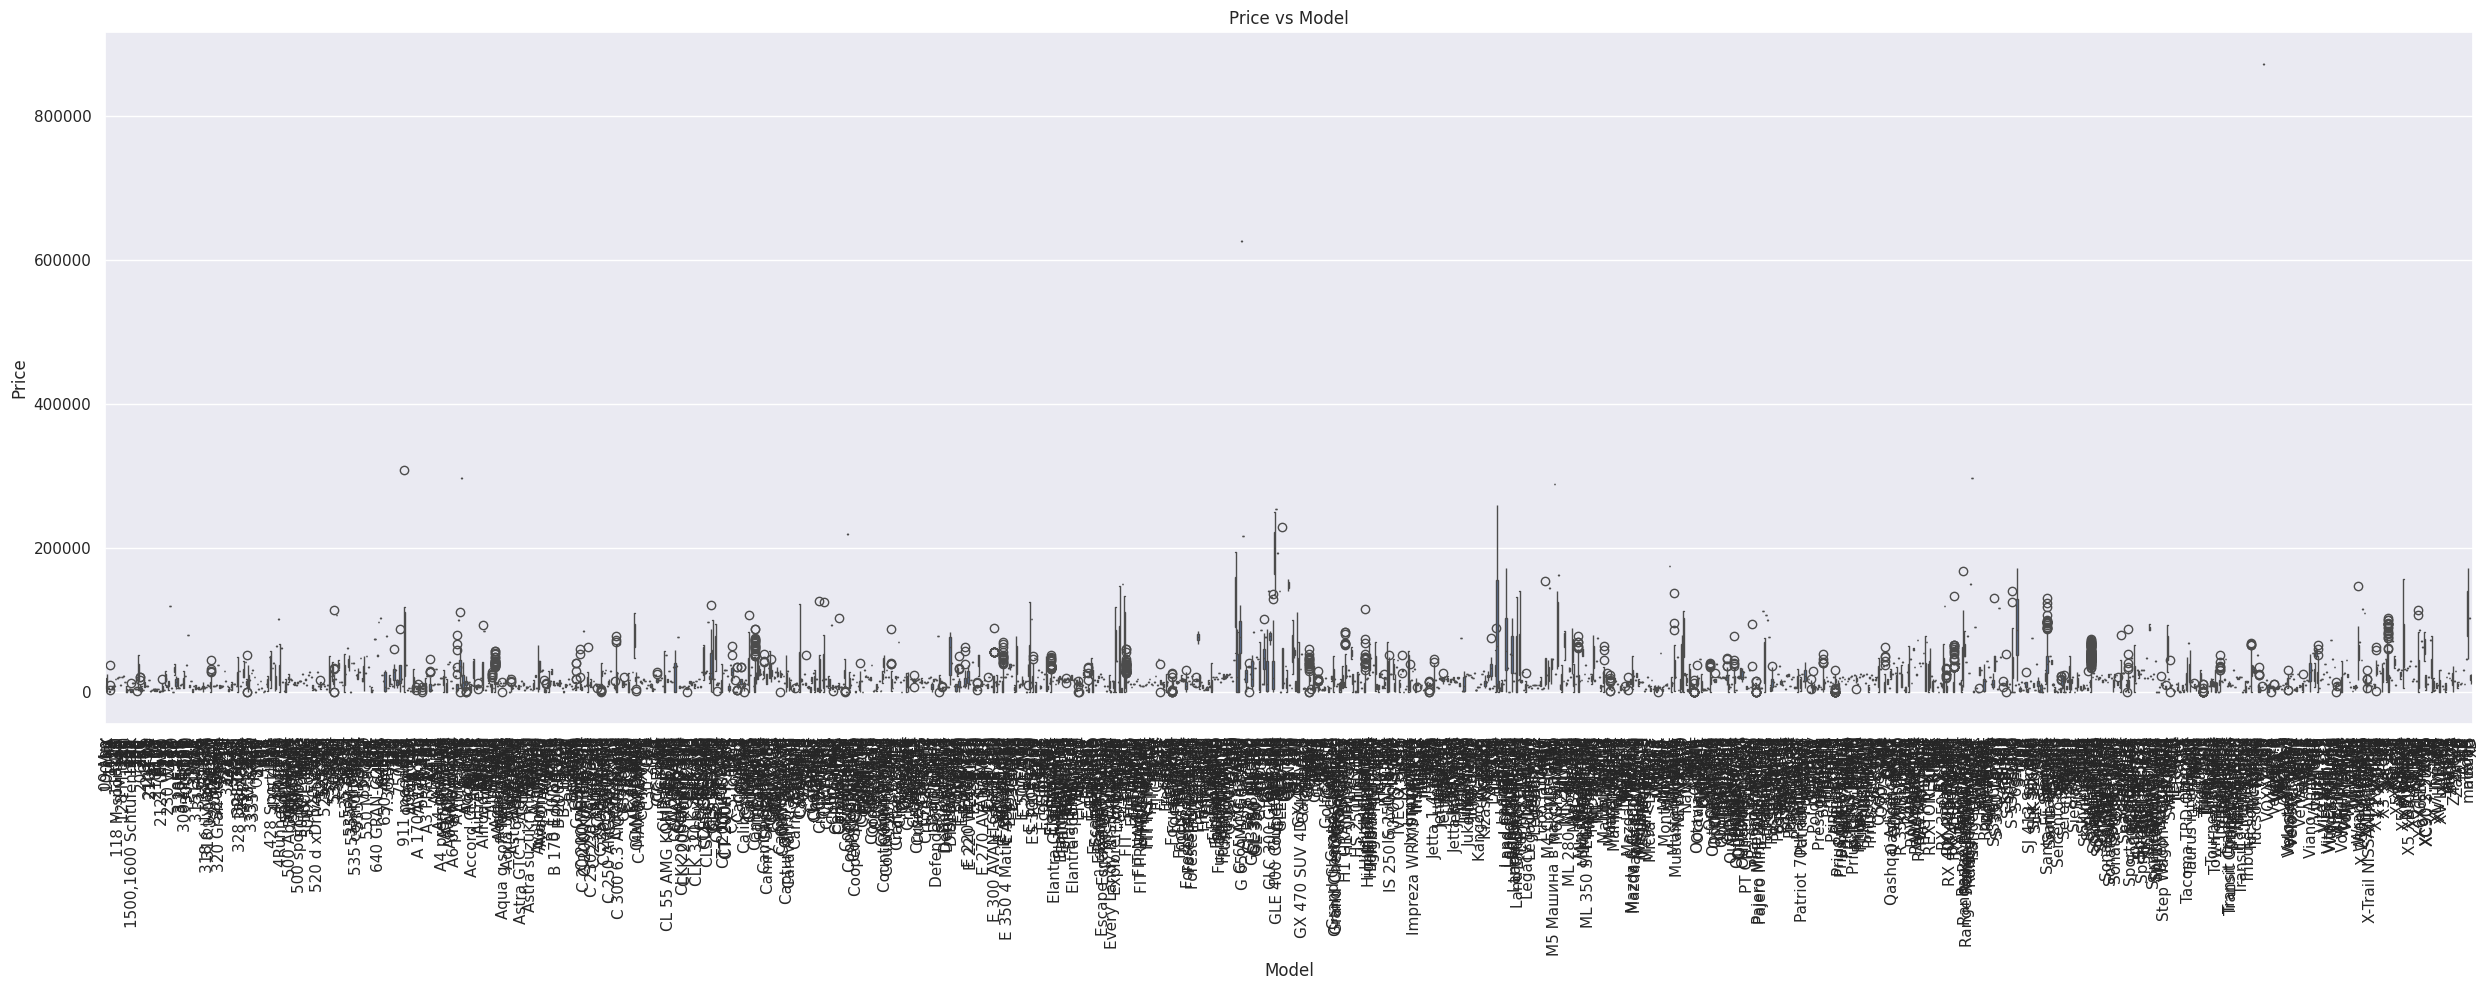

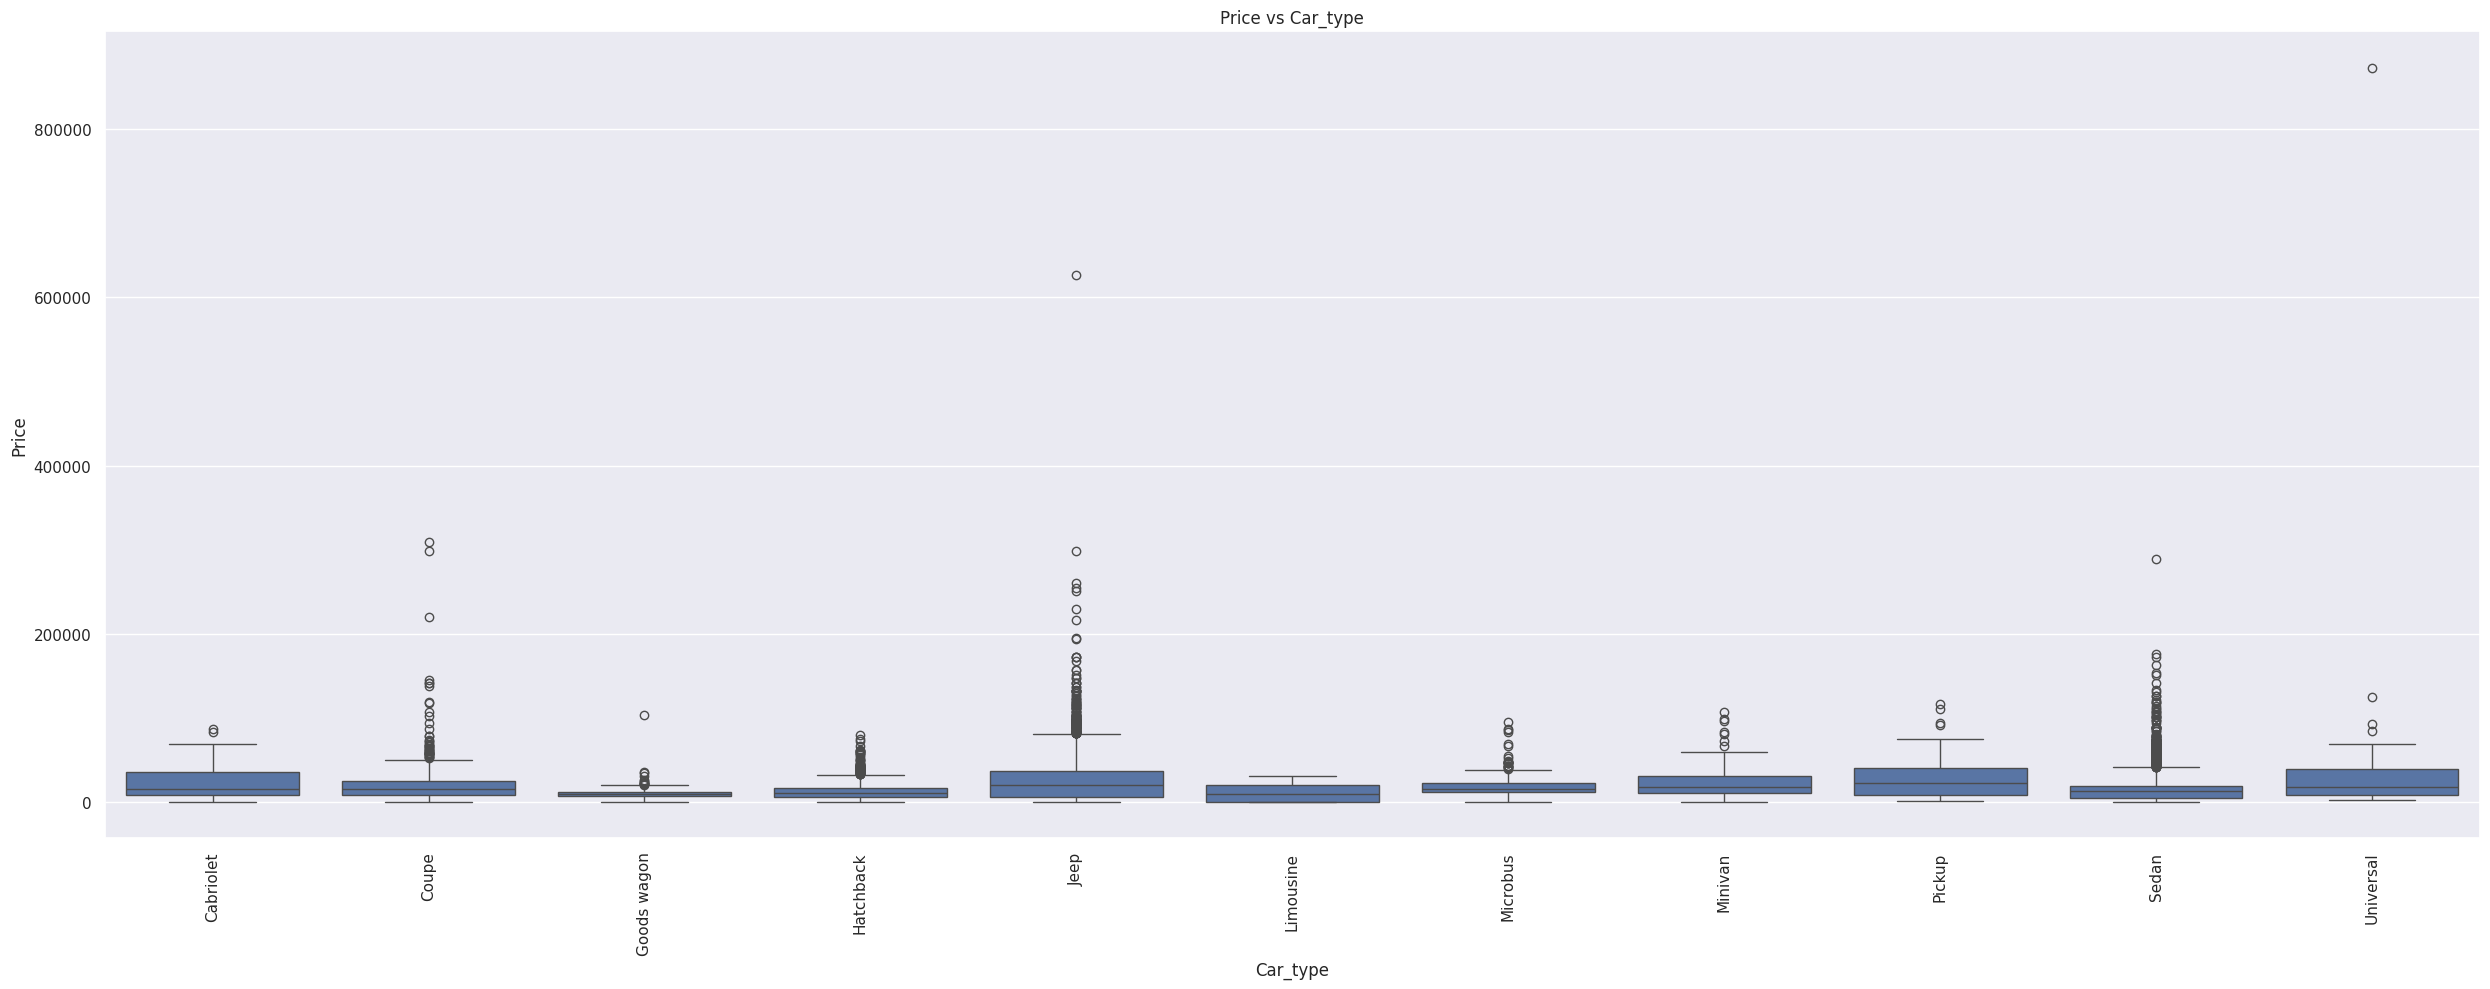

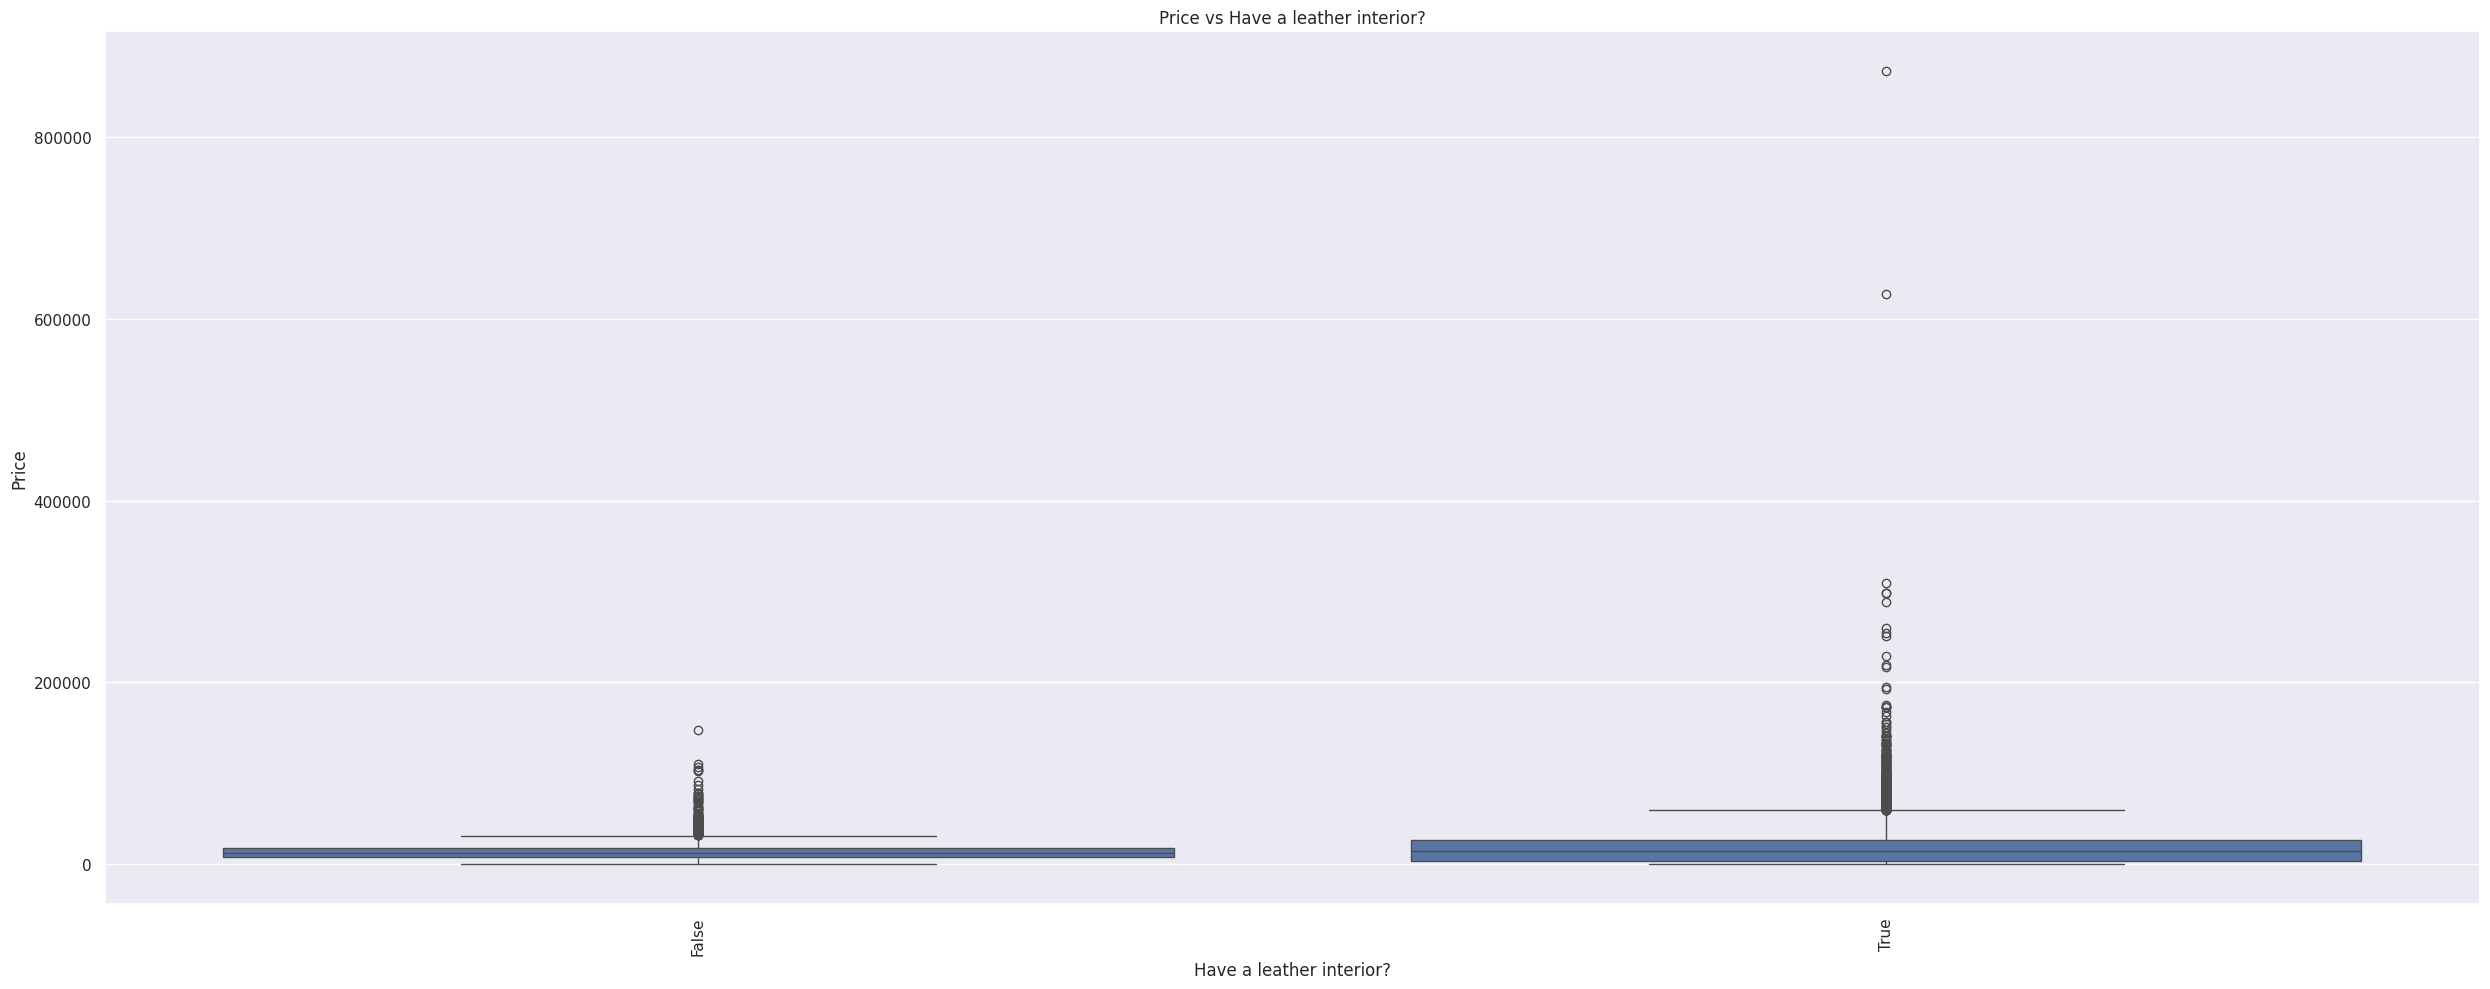

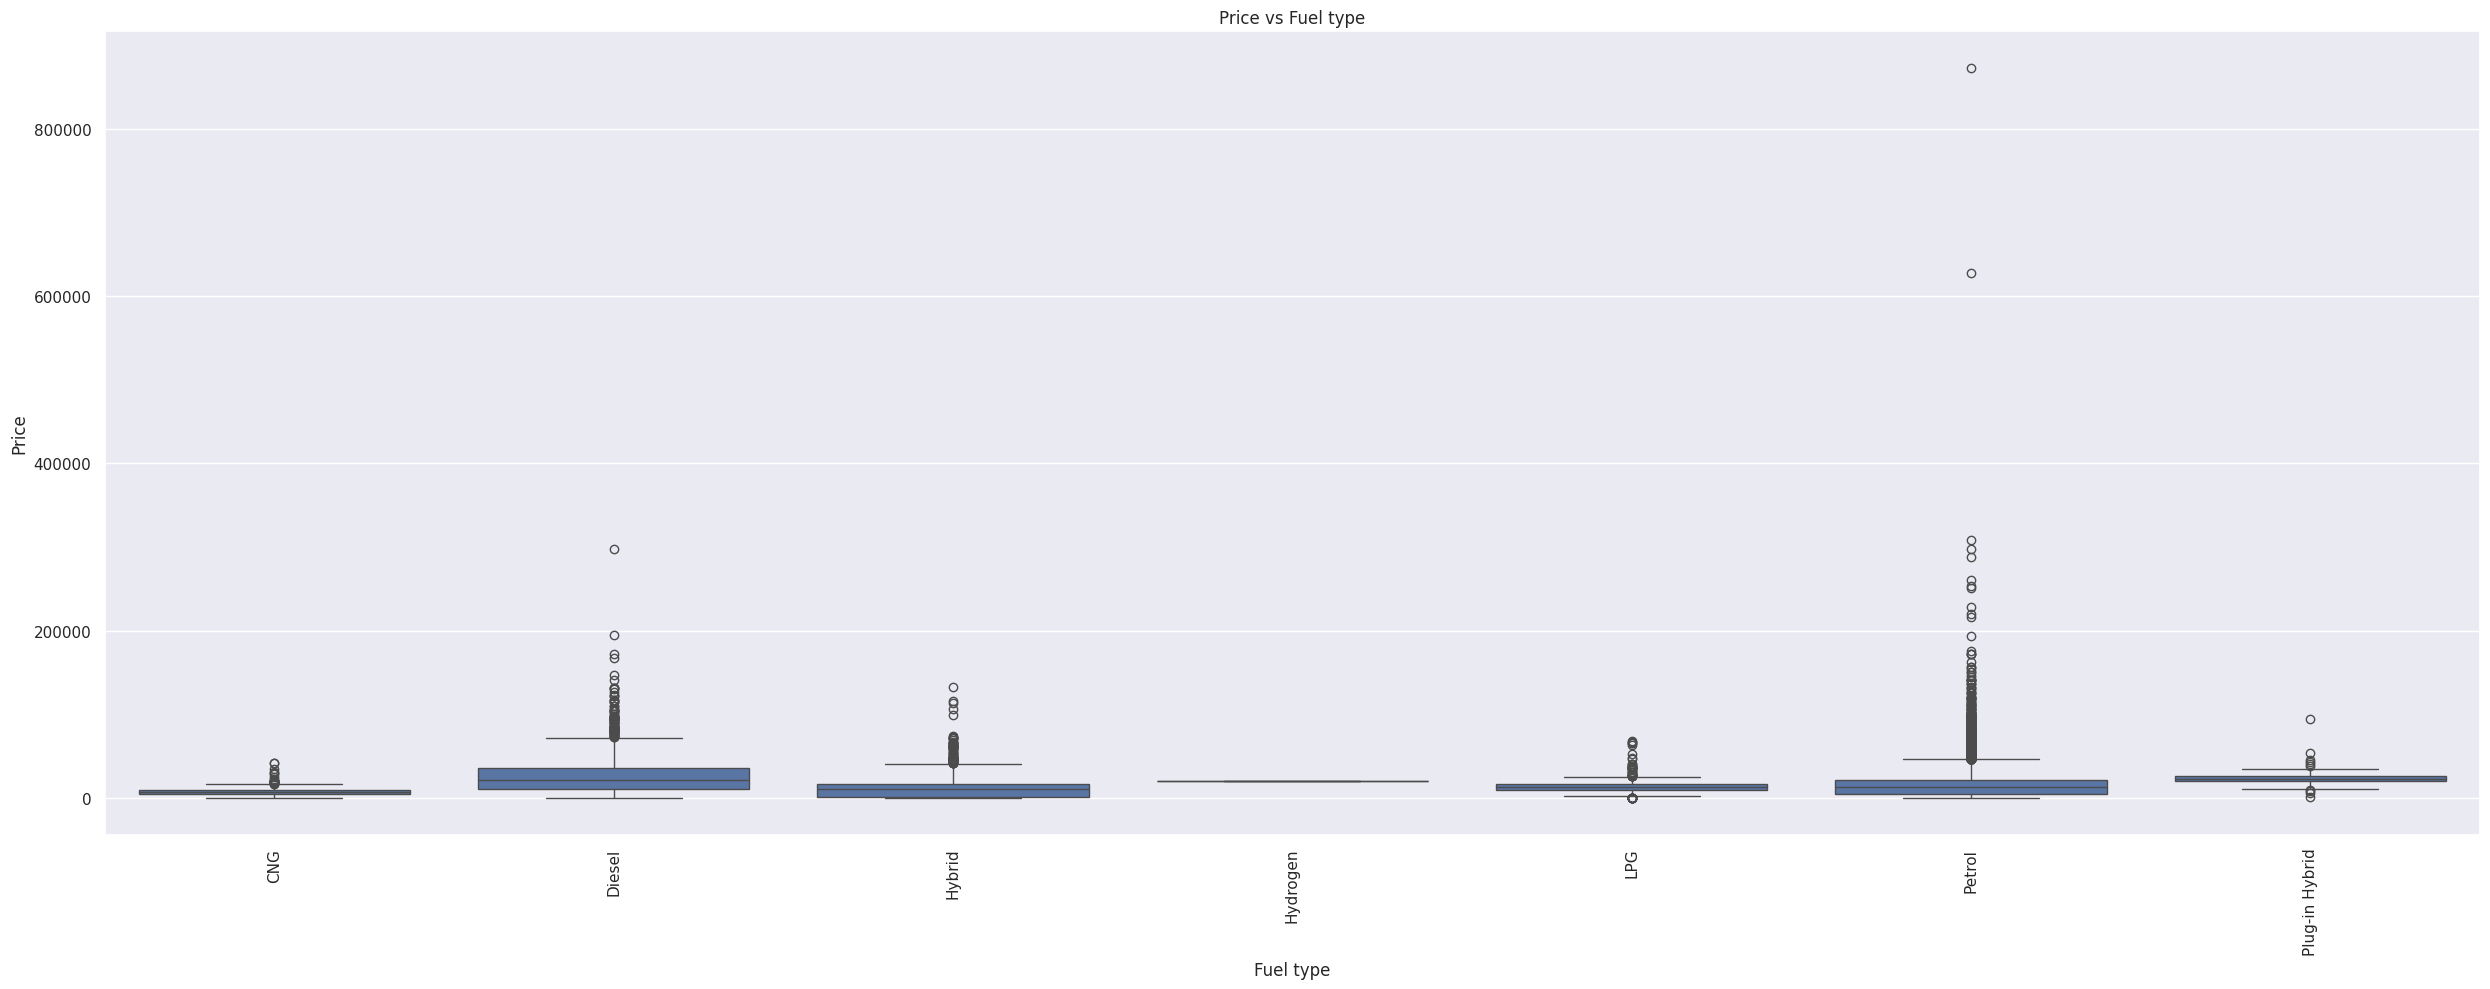

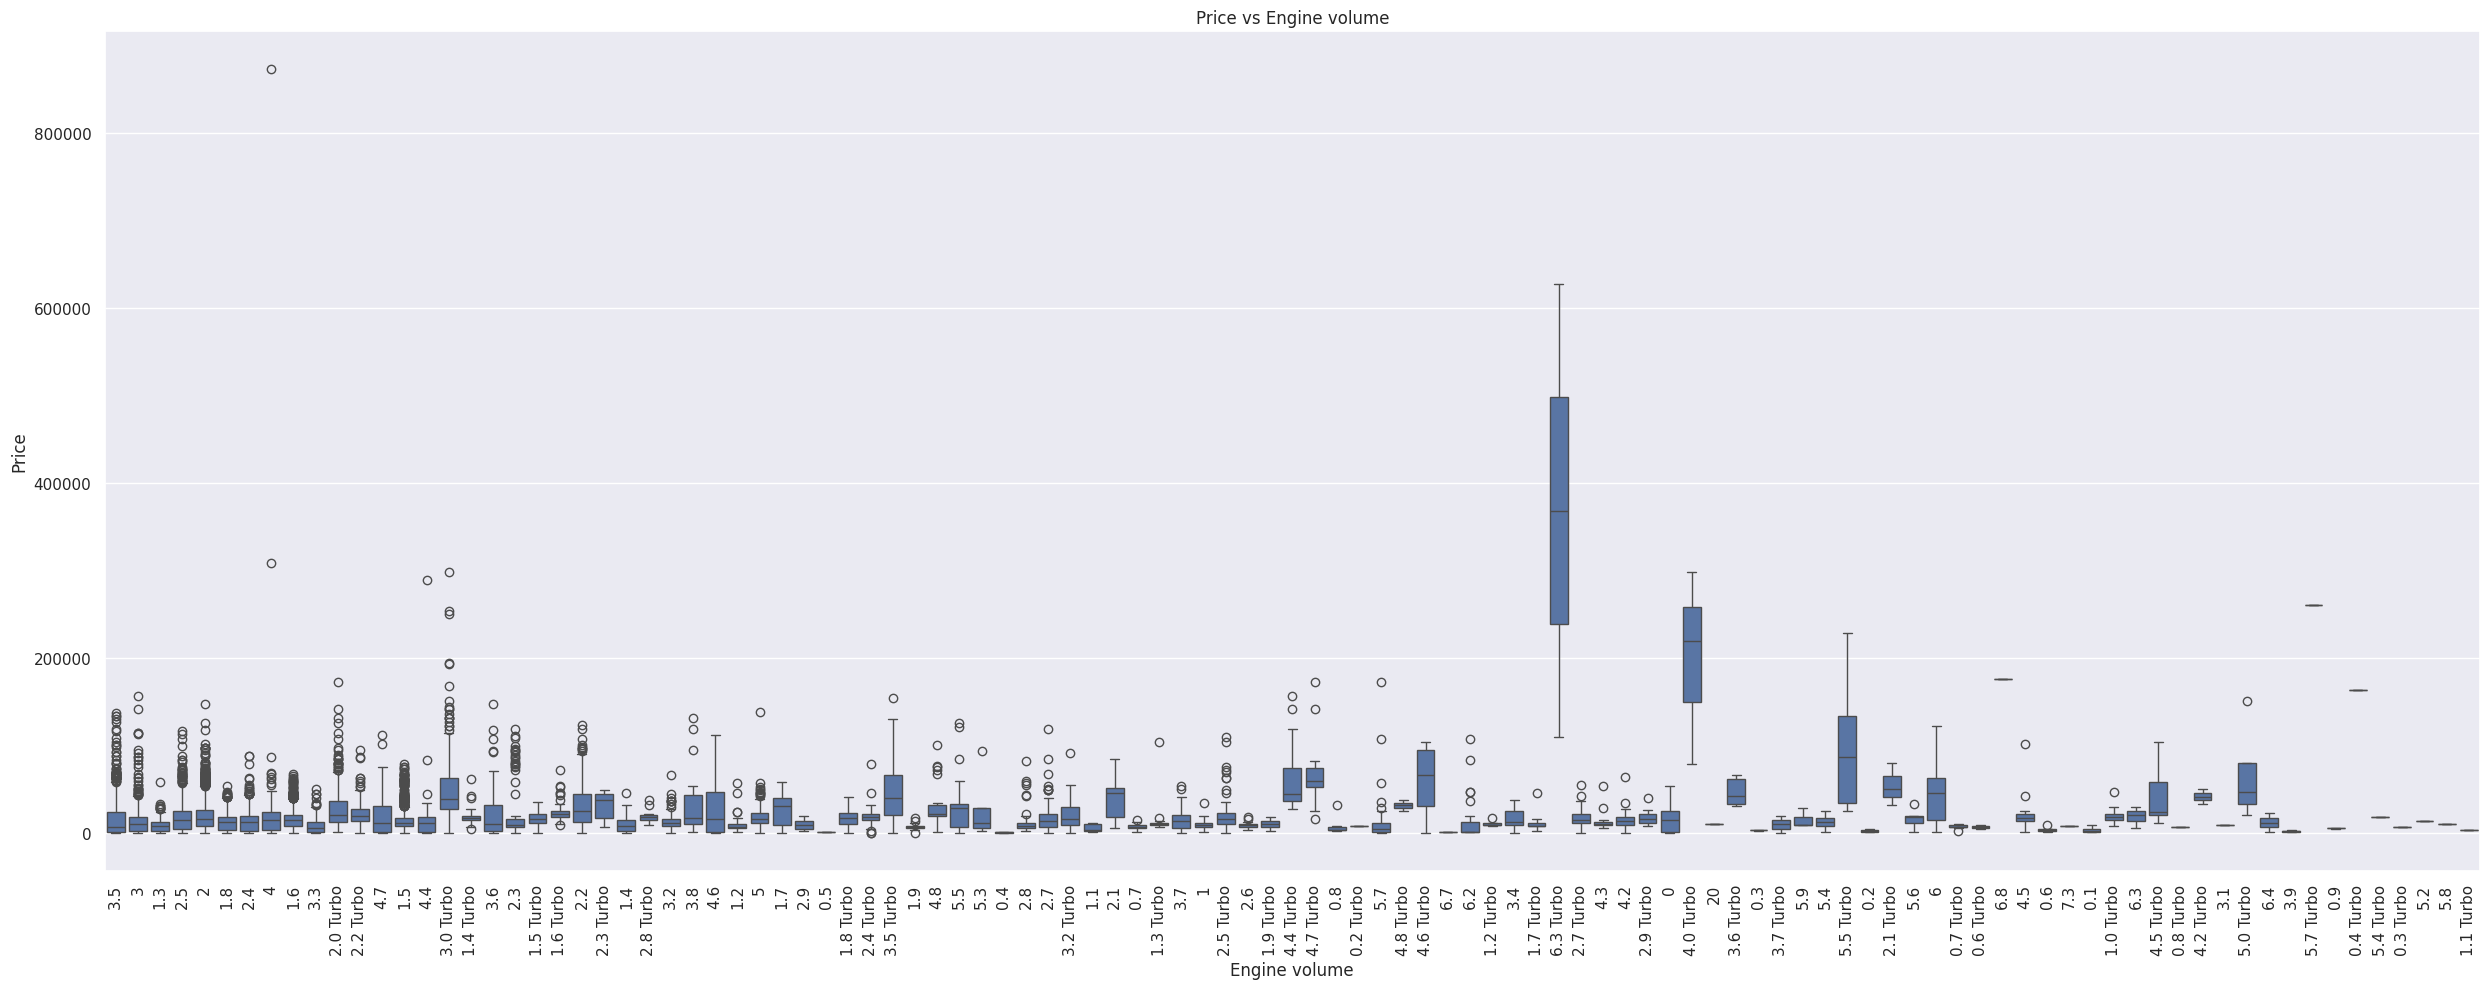

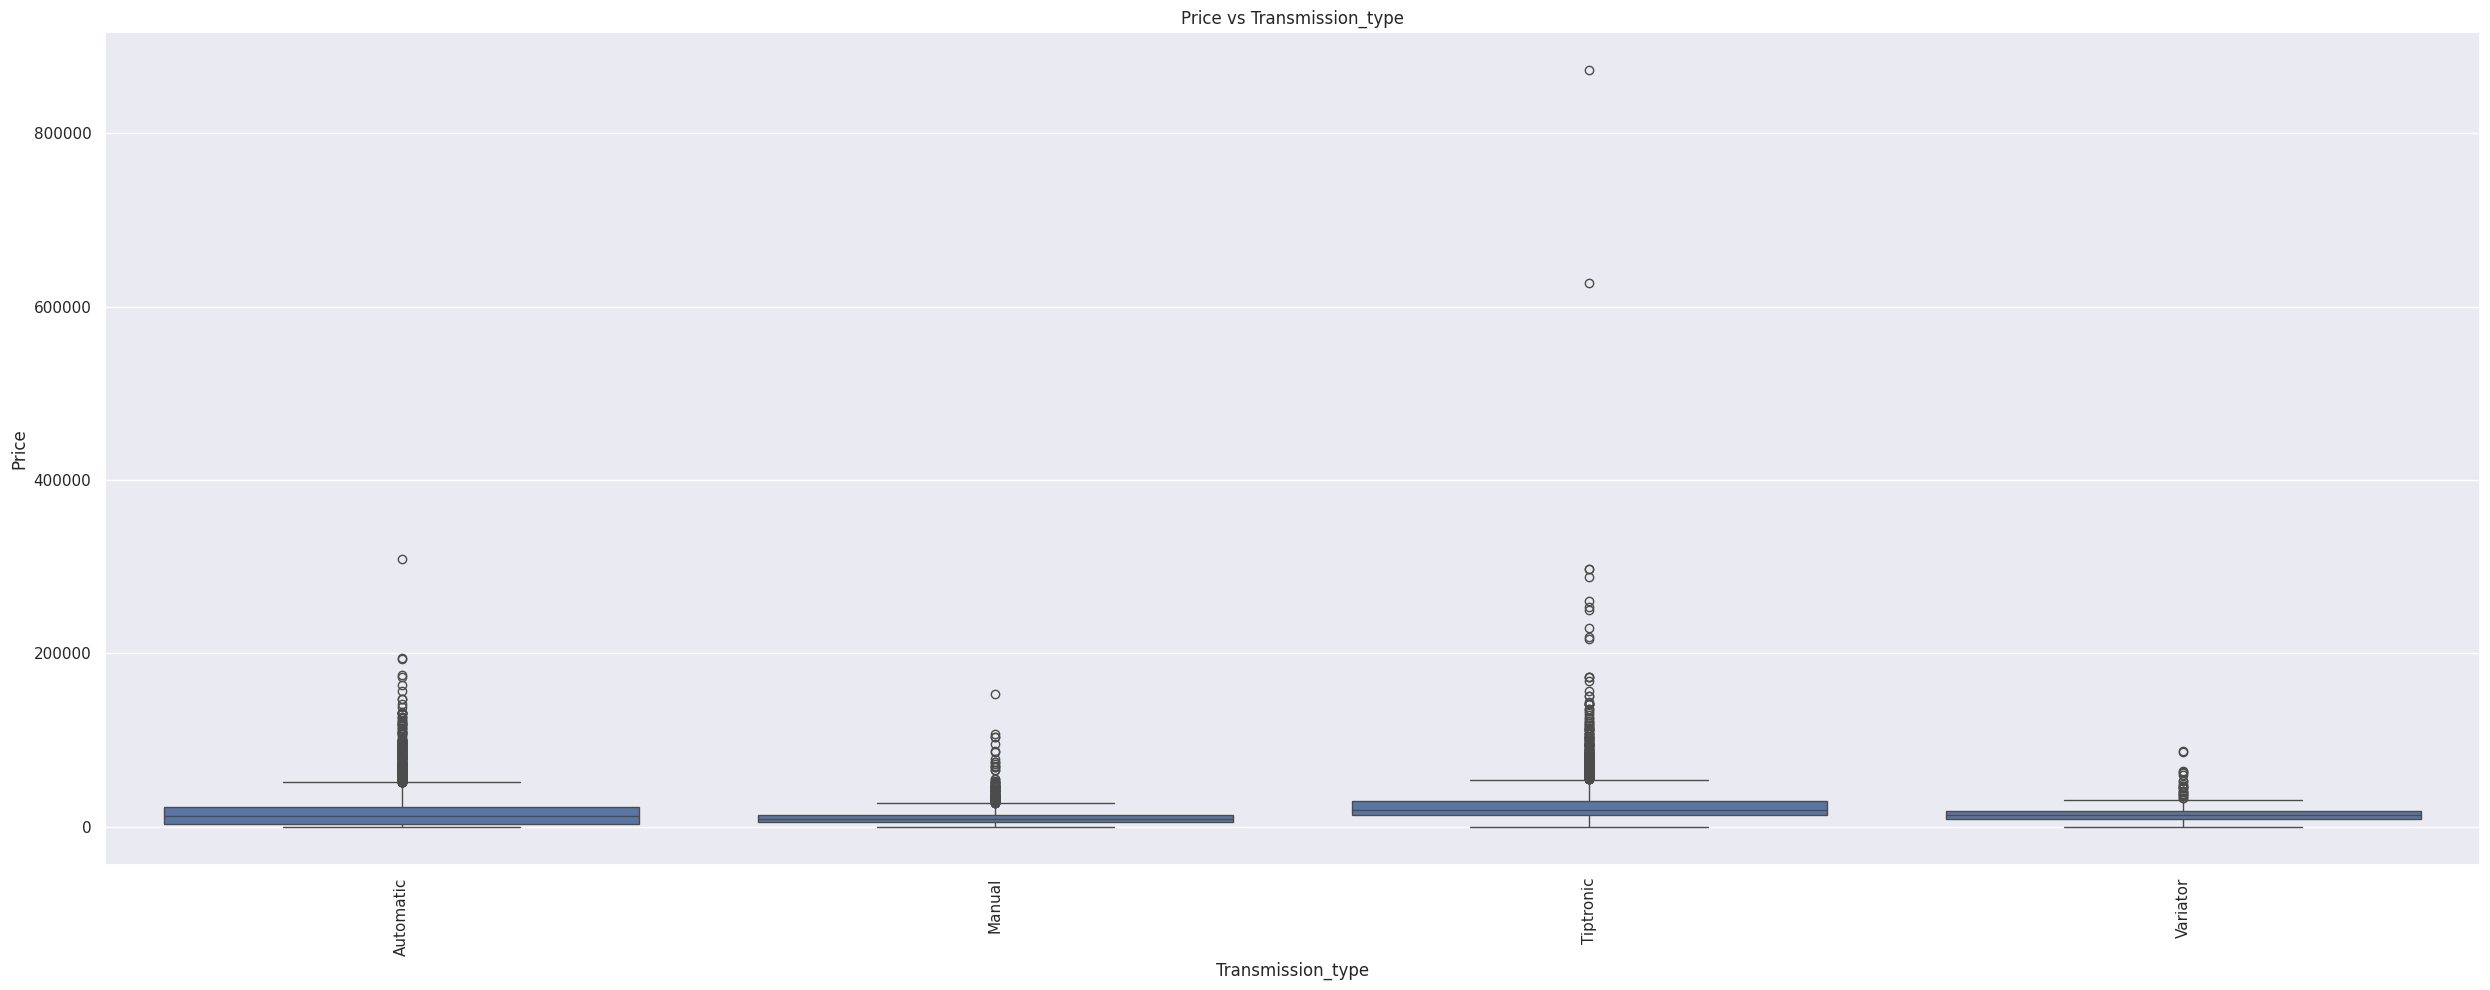

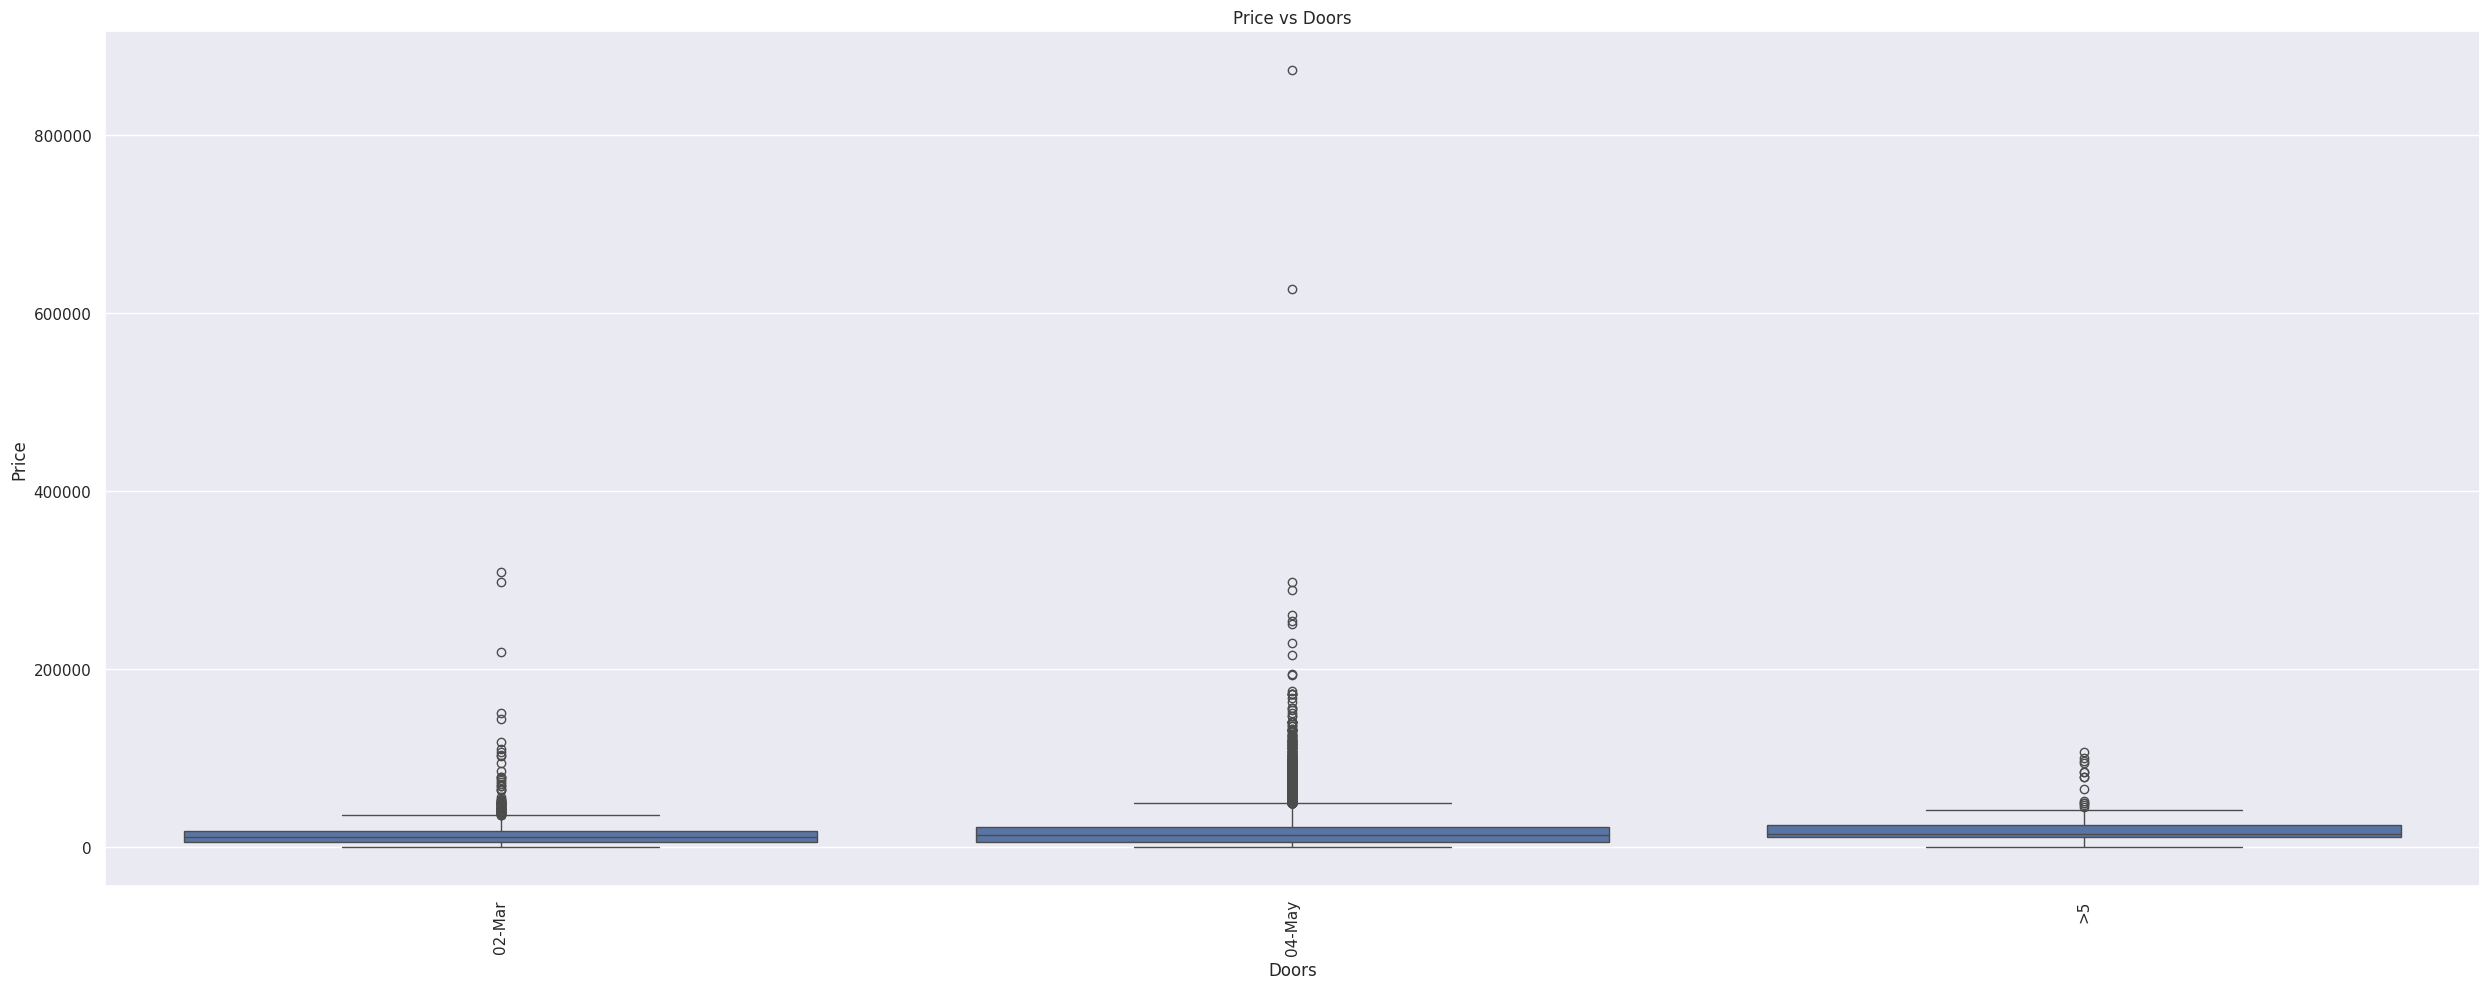

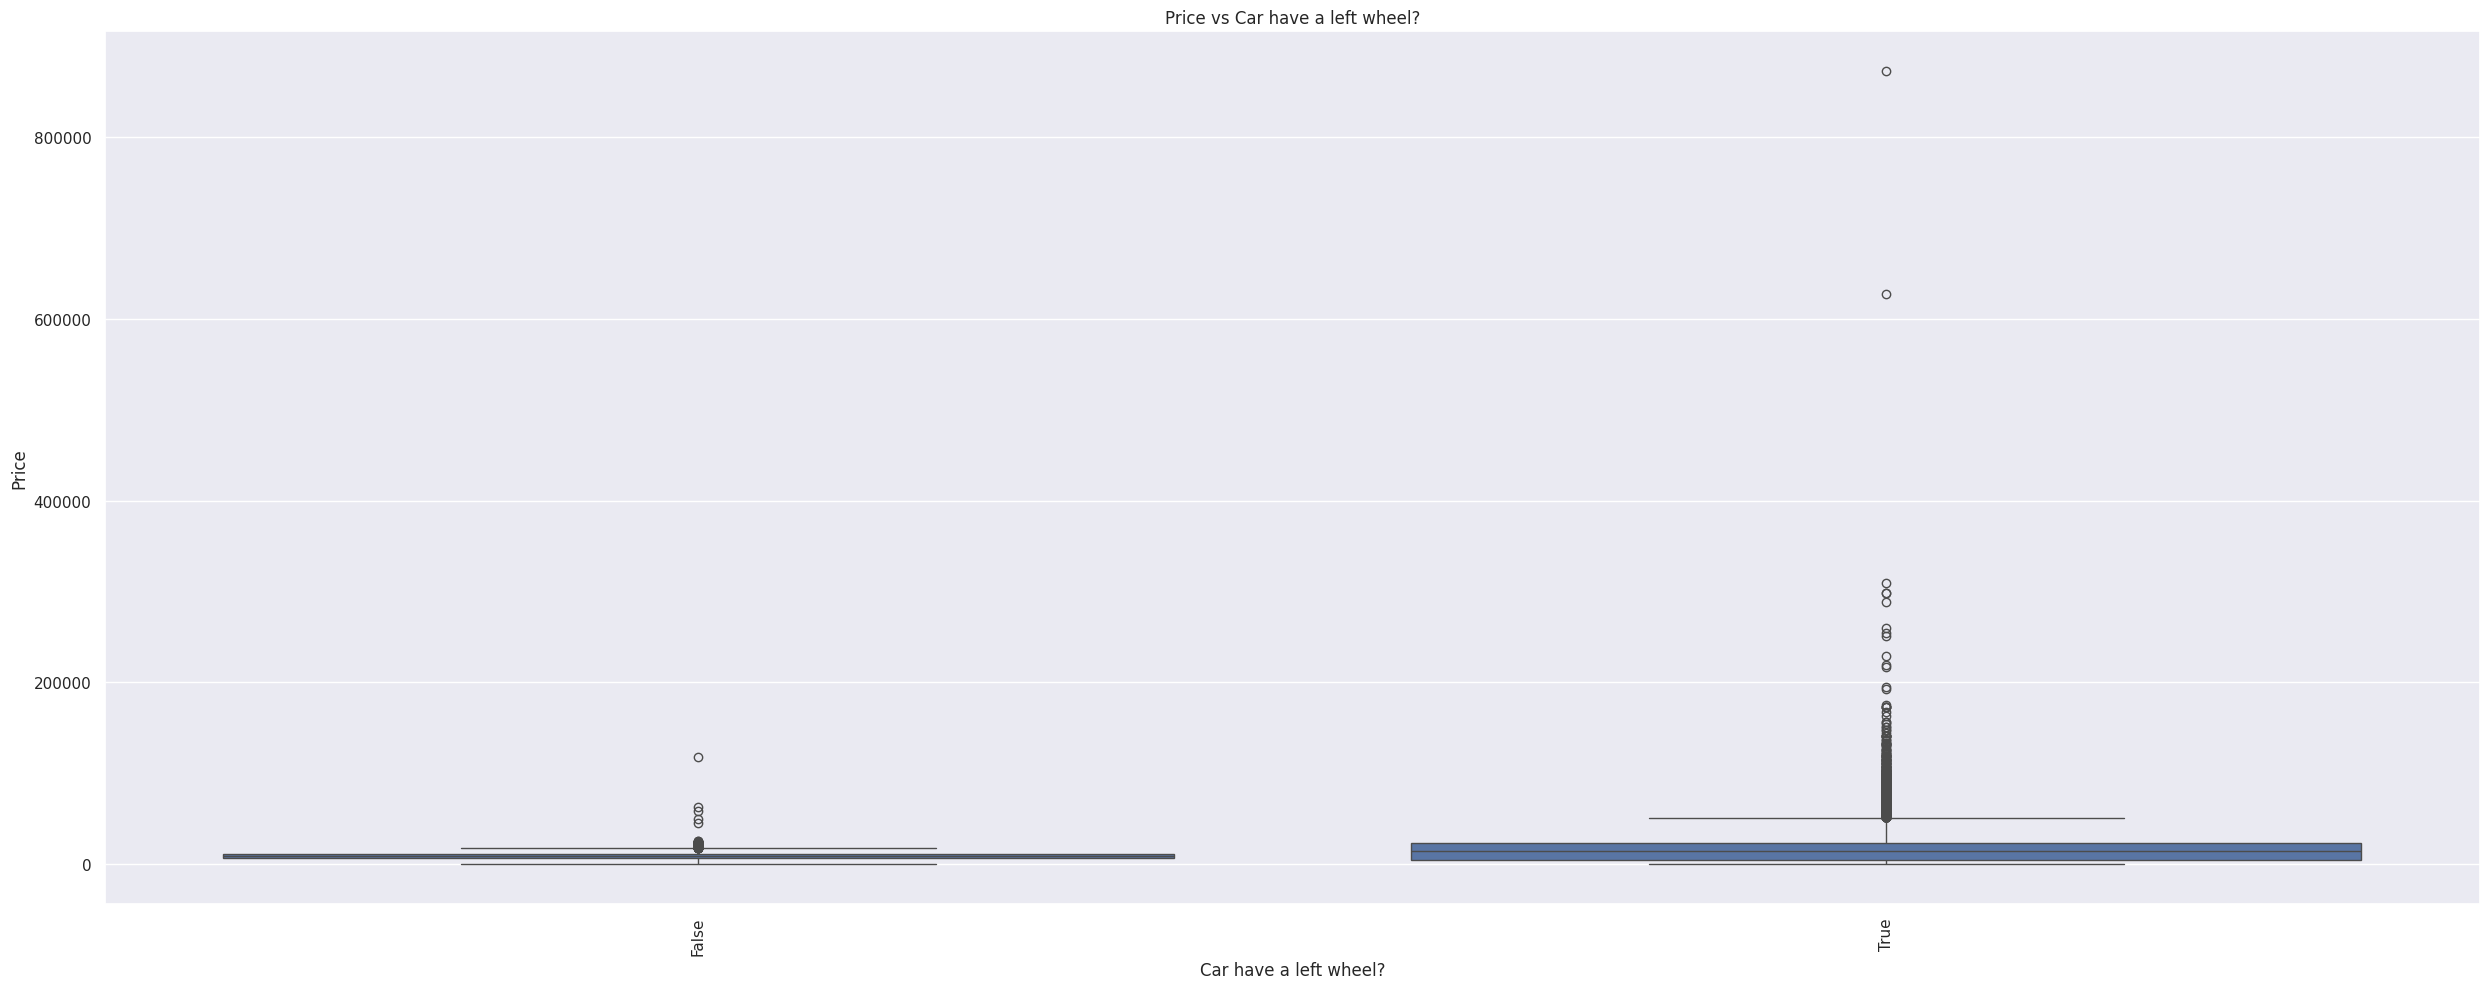

In [46]:
# включаем шрифт поддерживающий грузинские буквы, так как в таблице есть такие автомобили
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["font.sans-serif"] = ["DejaVu Sans", "Arial Unicode MS", "Liberation Sans"]

cat_ft = df_par.select_dtypes(exclude="number").columns

for features in cat_ft:
    n_cat = df_par[features].nunique()  # количество уникальных значений в признаке

    plt.figure(figsize=(25, 10))
    sns.boxplot(data=df_par, x=features, y="Price")
    plt.xticks(rotation=90)
    plt.title(f"Price vs {features}")
    plt.tight_layout()
    plt.show()

_К сожалению в связи с огромным количеством уникальных значений в признаке `Model` взять информацию с графика не представляется возможным_. Но какие выводы можно сделать по оставшимся:

- Выбросы в большинстве построенных boxplot являются значениями дорогих премиальных автомобилей - **Lamborgini, Bently и т.д**.
- В среднем медианы по цене авто на каждом boxplot находятся довольно низко. Но есть идеально расположившийся boxplot в признаке Engine volume - 6.3 Turbo.

_Промежуточный вывод_ - на среднюю цену автомобиля наибольшее влияние из категориальных признаков оказывает бренд (Lamborgini, Bently, Mersedes-Benz) и объем двигателя (особенно 6.3 Turbo). Остальные же параметры и признаки оказывают влияние по **минимуму**.  
Но есть подозрение, что в признаке `Model` также есть большое влияние у определенных типов автомобилей. Кроме того вызывает подозрение достоверность данных в связи с тем, что в признаке `Car_type` две категории - _Jeep и Limousine_ должны обладать куда более высокой медианой, чем есть на самом деле.

Вернем шрифт на первоначальный.

In [47]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Arial", "DejaVu Sans", "Liberation Sans"]

Далее, поиск в интернете и подсказки от AI, направили меня на поиск модели для создания **ранжирования признаков по влиянию на цену**.  
Так была найдена библиотека `scikit-learn` откуда взята модель `RandomForestRegressor`.
Код ниже это процесс работы данной модели.

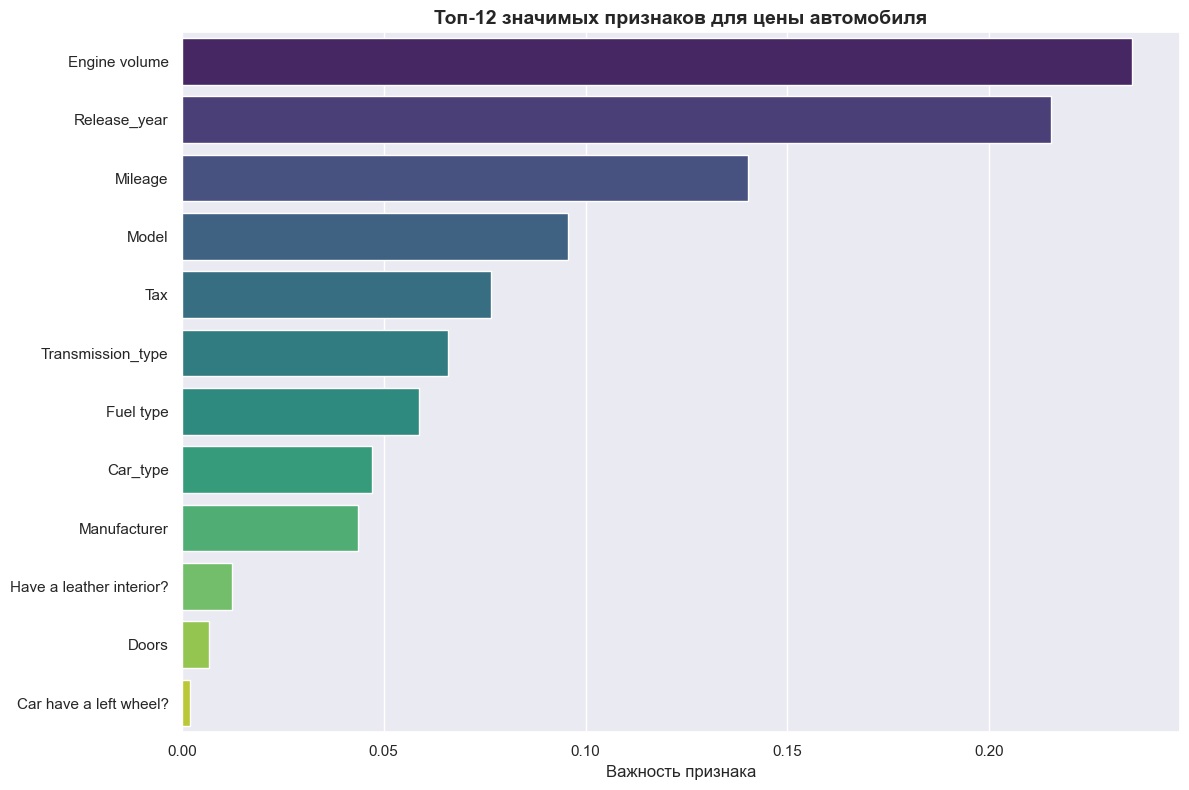

Ранжирование признаков по важности:
 8. Engine volume             | Важность: 0.2355
 4. Release_year              | Важность: 0.2153
 9. Mileage                   | Важность: 0.1403
 3. Model                     | Важность: 0.0956
 1. Tax                       | Важность: 0.0767
10. Transmission_type         | Важность: 0.0659
 7. Fuel type                 | Важность: 0.0588
 5. Car_type                  | Важность: 0.0471
 2. Manufacturer              | Важность: 0.0436
 6. Have a leather interior?  | Важность: 0.0125
11. Doors                     | Важность: 0.0067
12. Car have a left wheel?    | Важность: 0.0020


In [48]:
from sklearn.ensemble import RandomForestRegressor


ft = [
    col for col in df_par.columns if col not in ["Price", "ID"]
]  # исключаем ID и Price как признаки из анализа

X = df_par[ft].copy()  # на ось X ставятся наши признаки
y = df_par["Price"]

X_encoded = X.copy()
for col in X_encoded.select_dtypes(exclude="number").columns:
    X_encoded[col] = (
        X_encoded[col].astype("category").cat.codes
    )  # перевод категориальных признаков в числа

model = RandomForestRegressor(
    random_state=10, n_estimators=100
)  # cама модель, где n_estimators - количество деревьев решений(каждое анализирует по-своему), random_state - только для воспроизводимости результатов (может быть любым)
model.fit(X_encoded, y)

feature_importance = pd.DataFrame(
    {"feature": ft, "importance": model.feature_importances_}
).sort_values(
    "importance", ascending=False
)  # сортировка по важности

plt.figure(figsize=(12, 8))
sns.barplot(
    data=feature_importance.head(12),
    x="importance",
    y="feature",
    hue="feature",
    palette="viridis",
    legend=False,
)
plt.title(
    "Топ-12 значимых признаков для цены автомобиля", fontsize=14, fontweight="bold"
)
plt.xlabel(
    "Важность признака",
)
plt.ylabel("")
plt.tight_layout()
plt.show()

# Выводим таблицу с результатами
print("Ранжирование признаков по важности:")
print("=" * 50)
for i, row in feature_importance.iterrows():
    print(f"{i+1:2d}. {row['feature']:25} | Важность: {row['importance']:.4f}")

Рассмотрим также корреляцию основных числовых признаков с помощью `3D scatterplot`.
Как мы выяснили основными будут - _Release year_ и _Mileage_.

In [49]:
if len(top_corr_ft) >= 2:
    fig = px.scatter_3d(
        df_par,
        x=top_corr_ft[0],
        y=top_corr_ft[1],
        z="Price",
        color="Price",
        title=f"3D scatter: {top_corr_ft[0]} vs {top_corr_ft[1]} vs Price",
        template="seaborn",
        color_continuous_scale="viridis",
    )
    fig.show()

_Промежуточный вывод_ - чем новее автомобиль и чем меньше у него пробег, тем формируемая цена - **выше**.
Как и требовалось доказать. Но, на графике также видны 2 точки, выбивающиеся из картины по причине сильного воздействия на цену другого признака - `Model`


---

#### 7) Итоги

Это было сложно и местами непонятно, но мы добрались до конца анализа данных!  

_Итог_ - задача была решена. Из графика barplot мы видим, что наибольшее влияние на стоимость автомобиля оказывает два признака `Engine_volume` и `Release_year`. Далее все идет по убыванию.  
_Какой вывод сделал лично я?_ - есть ощущение, что данные были синтетическими, так как в них на предыдущих этапах были странные выбросы - скорее похожие на ошибки, которые создавал человек. Кроме того присутствовали магические числа в некоторых признаках, а в признаке `Tax` и только там были пустые значения.  
**Все это наводит на мысли об искуственности данных**

Но при этом же топ-3 признака в итоговой модели показывают на близкие к реальности факты:
- Чем старше автомобиль, тем он дешевле (исключая старые ретро-автомобили, которые не укладываются в такую модель).
- Чем больше у авто объем двигателя (а соответственно и мощность), тем он дороже. Причем это фактор №1 исходя из ранжирования.
- Чем меньше у автомобиля километраж, тем он дороже.

_Что меня удивило_:
- Удивил факт того, что **тип автомобиля**, **производитель** и **модель** - являются не самыми главными факторами в цене автомобиля. Но стоит учитывать, что модель и производитель решают среднюю цену, ибо Lamborgini и UAZ их медиана цены находится в разных местах.
- Также удивило, что тип руля оказывает наименьшее влияния на цену. Хотя при покупке машины из-за рубежа, особенно с Японии, если у машины правый руль, то и стоит она дешевле.

**ВЫВОД** - в большинстве своем анализ показал реальную картину формирования стоимости автомобиля, но есть подозрения в том, что взятый dataset с kaggle имеет искусственное происхождение.